In [3]:
import mdtraj as md
import numpy as np

In [36]:
# first we're going to use homology models for 1zkk_a, 4ij8_a and apo_a - alpha-carbon only

In [37]:
# ok so we're going to calculate the mean of top10 per microstate, to 3 homology models, c-alpha only, align on 
# set domain, calculate rmsd of everything, just set-I, just c-flank, plot those on 2D - all 3 combinations

In [38]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [4]:
cluster_top10 = [md.load('h5/%d.h5' % x) for x in range(100)]

In [5]:
zkk = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/1zkk_a.pdb')
ij8 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/4ij8_a.pdb')
apo = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/apo_a.pdb')

In [41]:
cluster_top10_ca = [x.atom_slice(x.top.select('name CA')) for x in cluster_top10]

In [42]:
zkk_ca = zkk.atom_slice(zkk.top.select('name CA'))
ij8_ca = ij8.atom_slice(ij8.top.select('name CA'))
apo_ca = apo.atom_slice(apo.top.select('name CA'))

In [9]:
#Align to reference
#trajectory.superpose(reference, atom_indices=selection1, ref_atom_indices=selection1)
# Compute the RMSD manually without additional alignment
#rmsd = np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))

In [10]:
#color orange, resi 0-23

#color cyan, resi 24-58
#color cyan, resi 94-143

#color blue, resi 59-93

#color yellow, resi 144-161

In [43]:
whole_rmsds = []
seti_rmsds = []
cflank_rmsds = []
selection1 = np.concatenate([np.arange(24,59), np.arange(94,144)])

for i in range(100):
    trajectory = cluster_top10_ca[i]
    whole_rmsds.append([])
    seti_rmsds.append([])
    cflank_rmsds.append([])
         
    # whole protein
    reference = zkk_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
    
    reference = ij8_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
                            
    reference = apo_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
    
    # SETI
    selection2 = np.arange(59,94) 
                            
    reference = zkk_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = ij8_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                  
    
    reference = apo_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    seti_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2)))) 
    
    # Cflank
    selection2 = np.arange(144,162) 
                            
    reference = zkk_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))
    
    reference = ij8_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                        
    
    reference = apo_ca            
    trajectory.superpose(reference, atom_indices=selection1)
    cflank_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz[:, selection2, :] - reference.xyz[:, selection2, :])**2, axis=(1,2))))                        

In [12]:
# save

In [13]:
np.save('whole_rmsds', whole_rmsds)

In [15]:
with open('whole_rmsds.txt', 'w') as f:
    f.write(str(whole_rmsds))

In [17]:
# just do the top frame and save too

In [8]:
whole_rmsds_top_frame = []

for microstate in whole_rmsds:
    whole_rmsds_top_frame.append((microstate[0][0], microstate[1][0], microstate[2][0]))

In [21]:
with open('whole_rmsds_top_frame.txt', 'w') as f:
    f.write(str(whole_rmsds_top_frame))

In [10]:
whole_rmsds[0]

[array([ 0.76908958,  0.74471545,  0.82235521,  0.82325268,  0.90307599,
         0.7463122 ,  0.6963433 ,  0.86669201,  0.77827668,  0.72816509], dtype=float32),
 array([ 0.79140878,  0.75290132,  0.83804655,  0.84995037,  0.83627278,
         0.75981635,  0.71658516,  0.83737016,  0.7717787 ,  0.74547583], dtype=float32),
 array([ 0.54520798,  0.53639776,  0.60168946,  0.5565716 ,  0.68312722,
         0.56398505,  0.55342245,  0.68133515,  0.57281148,  0.61237031], dtype=float32)]

In [11]:
seti_rmsds[0]

[array([ 0.30304703,  0.3644661 ,  0.30430949,  0.24057037,  0.84770089,
         0.27743039,  0.32137343,  0.73493612,  0.35512275,  0.23130077], dtype=float32),
 array([ 0.5291689 ,  0.55606121,  0.49224386,  0.52894771,  0.52488869,
         0.50104934,  0.56454659,  0.49871343,  0.4649663 ,  0.53132194], dtype=float32),
 array([ 0.77896273,  0.79296476,  0.71905249,  0.76852745,  0.49270746,
         0.74554712,  0.8186152 ,  0.50974596,  0.68320674,  0.75535148], dtype=float32)]

In [23]:
# ok let's now plot 3 combinations x 3 whole/SETI/Cflank choices - just the top frame of top microstate per macrostate

In [44]:
meta_membs = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/metastable_memberships.npy')

In [12]:
np.argmax(meta_membs[:,0])

48

In [13]:
meta_sets = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/metastable_sets.npy')

In [14]:
meta_sets

array([array([48, 76]), array([47, 97]), array([18, 27]), array([35, 84]),
       array([67]), array([23, 29, 45]), array([65, 72, 83]),
       array([ 5, 17, 32, 40, 70]), array([21, 96]), array([58]),
       array([ 4, 69]), array([ 1, 43]), array([57]),
       array([41, 44, 66, 74, 85, 93]), array([33, 42, 60, 75, 88]),
       array([ 6, 15, 59, 86]),
       array([ 8, 11, 19, 30, 36, 38, 49, 63, 78, 81]),
       array([10, 12, 24, 56, 90]), array([ 0,  9, 39, 71, 77, 91]),
       array([14, 22, 31, 92, 99]), array([20, 28]),
       array([ 3,  7, 13, 16, 25, 37, 62, 68, 73, 82, 95, 98]),
       array([26, 50, 51, 54, 55, 61, 79, 80, 87, 89, 94]),
       array([ 2, 34, 46, 52, 53, 64])], dtype=object)

In [15]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [16]:
# zkk - ij8, zkk - apo, ij8 - apo

In [17]:
len(whole_rmsds)

100

In [18]:
len(whole_rmsds[0])

3

In [19]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

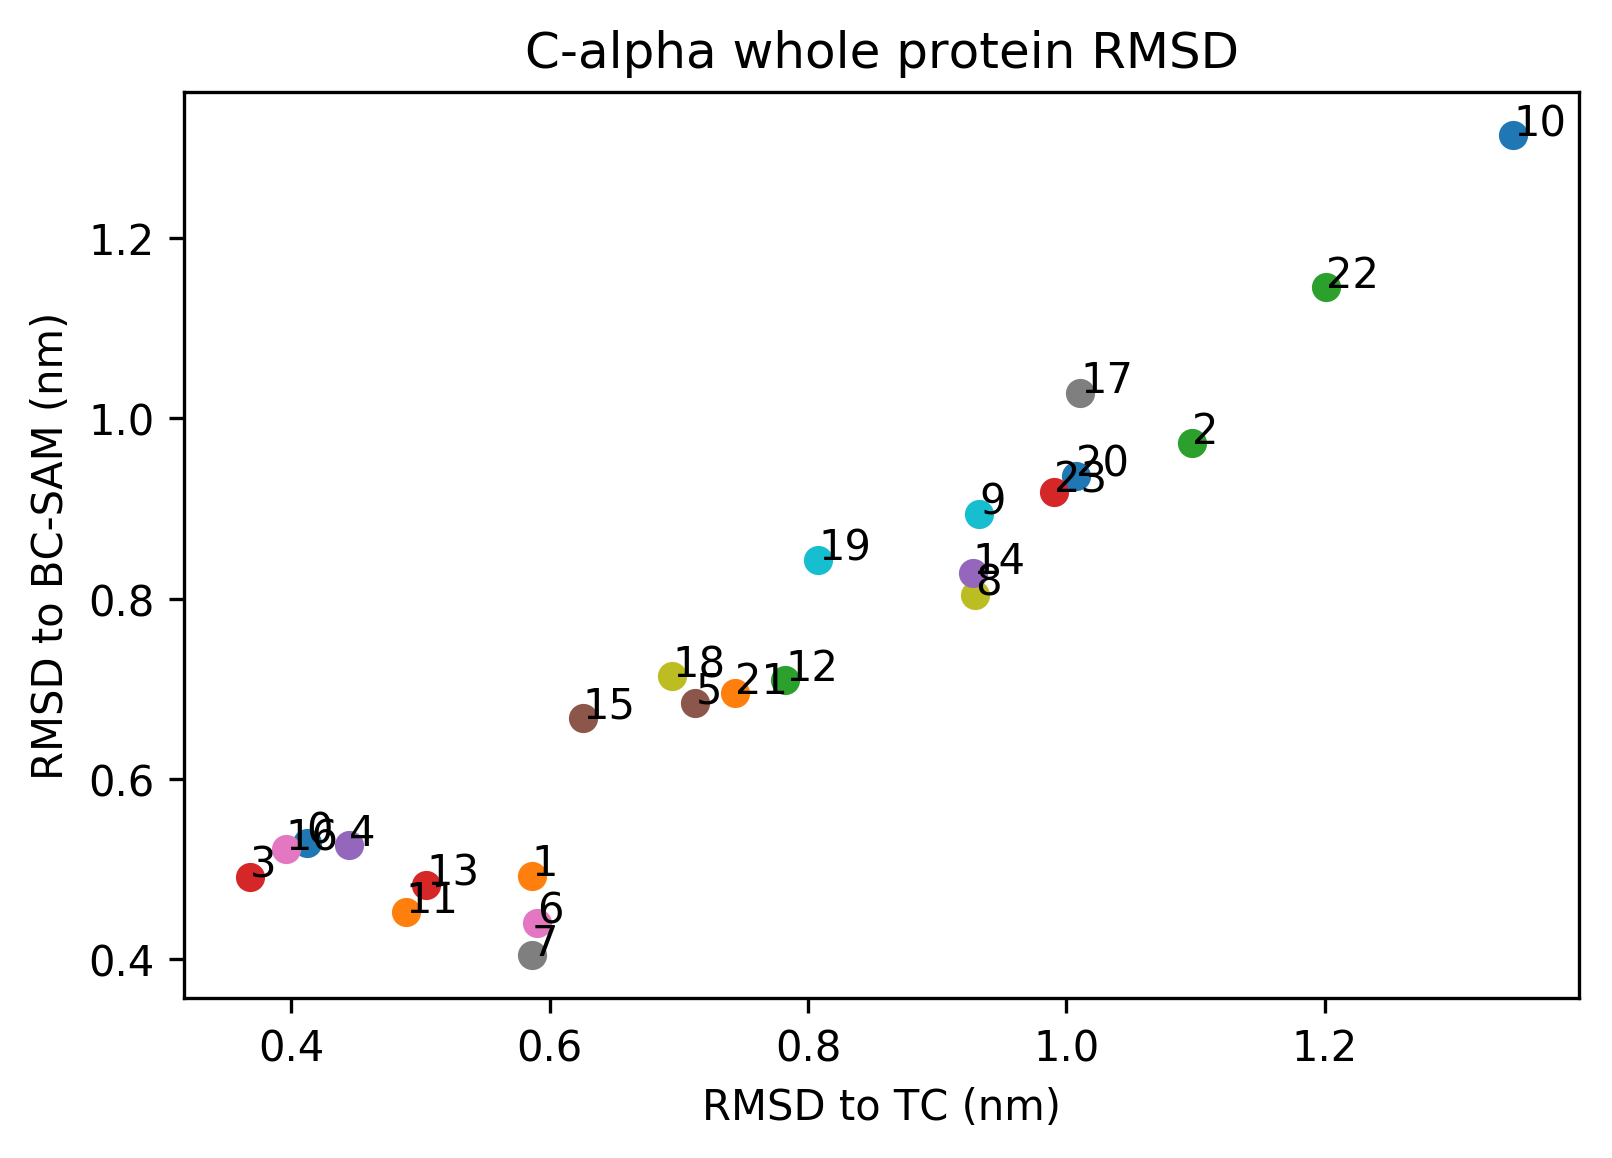

In [58]:
# try zkk - ij8, whole protein
fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][0][0], whole_rmsds[j][1][0])
    ax.annotate('%d' % i, (whole_rmsds[j][0][0], whole_rmsds[j][1][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to BC-SAM (nm)')
plt.title('C-alpha whole protein RMSD')
plt.show()    

In [57]:
# ok so do all 9 plots

In [59]:
fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][0][0], whole_rmsds[j][1][0])
    ax.annotate('%d' % i, (whole_rmsds[j][0][0], whole_rmsds[j][1][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to BC-SAM (nm)')
plt.title('C-alpha whole protein RMSD')
plt.savefig('rmsd_plots/whole_TC_SAM.png', dpi=300)
plt.close()

fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][0][0], whole_rmsds[j][2][0])
    ax.annotate('%d' % i, (whole_rmsds[j][0][0], whole_rmsds[j][2][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to APO (nm)')
plt.title('C-alpha whole protein RMSD')
plt.savefig('rmsd_plots/whole_TC_APO.png', dpi=300)
plt.close()

fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][1][0], whole_rmsds[j][2][0])
    ax.annotate('%d' % i, (whole_rmsds[j][1][0], whole_rmsds[j][2][0]))
plt.xlabel('RMSD to BC-SAM (nm)')
plt.ylabel('RMSD to APO (nm)')
plt.title('C-alpha whole protein RMSD')
plt.savefig('rmsd_plots/whole_SAM_APO.png', dpi=300)
plt.close()

In [60]:
fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(seti_rmsds[j][0][0], seti_rmsds[j][1][0])
    ax.annotate('%d' % i, (seti_rmsds[j][0][0], seti_rmsds[j][1][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to BC-SAM (nm)')
plt.title('C-alpha SET-I only RMSD')
plt.savefig('rmsd_plots/seti_TC_SAM.png', dpi=300)
plt.close()

fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(seti_rmsds[j][0][0], seti_rmsds[j][2][0])
    ax.annotate('%d' % i, (seti_rmsds[j][0][0], seti_rmsds[j][2][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to APO (nm)')
plt.title('C-alpha SET-I only RMSD')
plt.savefig('rmsd_plots/seti_TC_APO.png', dpi=300)
plt.close()

fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(seti_rmsds[j][1][0], seti_rmsds[j][2][0])
    ax.annotate('%d' % i, (seti_rmsds[j][1][0], seti_rmsds[j][2][0]))
plt.xlabel('RMSD to BC-SAM (nm)')
plt.ylabel('RMSD to APO (nm)')
plt.title('C-alpha SET-I only RMSD')
plt.savefig('rmsd_plots/seti_SAM_APO.png', dpi=300)
plt.close()

In [61]:
fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(cflank_rmsds[j][0][0], cflank_rmsds[j][1][0])
    ax.annotate('%d' % i, (cflank_rmsds[j][0][0], cflank_rmsds[j][1][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to BC-SAM (nm)')
plt.title('C-alpha C-flank only protein RMSD')
plt.savefig('rmsd_plots/cflank_TC_SAM.png', dpi=300)
plt.close()

fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(cflank_rmsds[j][0][0], cflank_rmsds[j][2][0])
    ax.annotate('%d' % i, (cflank_rmsds[j][0][0], cflank_rmsds[j][2][0]))
plt.xlabel('RMSD to TC (nm)')
plt.ylabel('RMSD to APO (nm)')
plt.title('C-alpha C-flank only protein RMSD')
plt.savefig('rmsd_plots/cflank_TC_APO.png', dpi=300)
plt.close()

fig, ax = plt.subplots(dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(cflank_rmsds[j][1][0], cflank_rmsds[j][2][0])
    ax.annotate('%d' % i, (cflank_rmsds[j][1][0], cflank_rmsds[j][2][0]))
plt.xlabel('RMSD to BC-SAM (nm)')
plt.ylabel('RMSD to APO (nm)')
plt.title('C-alpha C-flank only protein RMSD')
plt.savefig('rmsd_plots/cflank_SAM_APO.png', dpi=300)
plt.close()

In [ ]:
#### extra - x axis is C flanking to TC, and y axis is SET-I to APO

In [69]:
import seaborn as sns
sns.set_style('ticks')

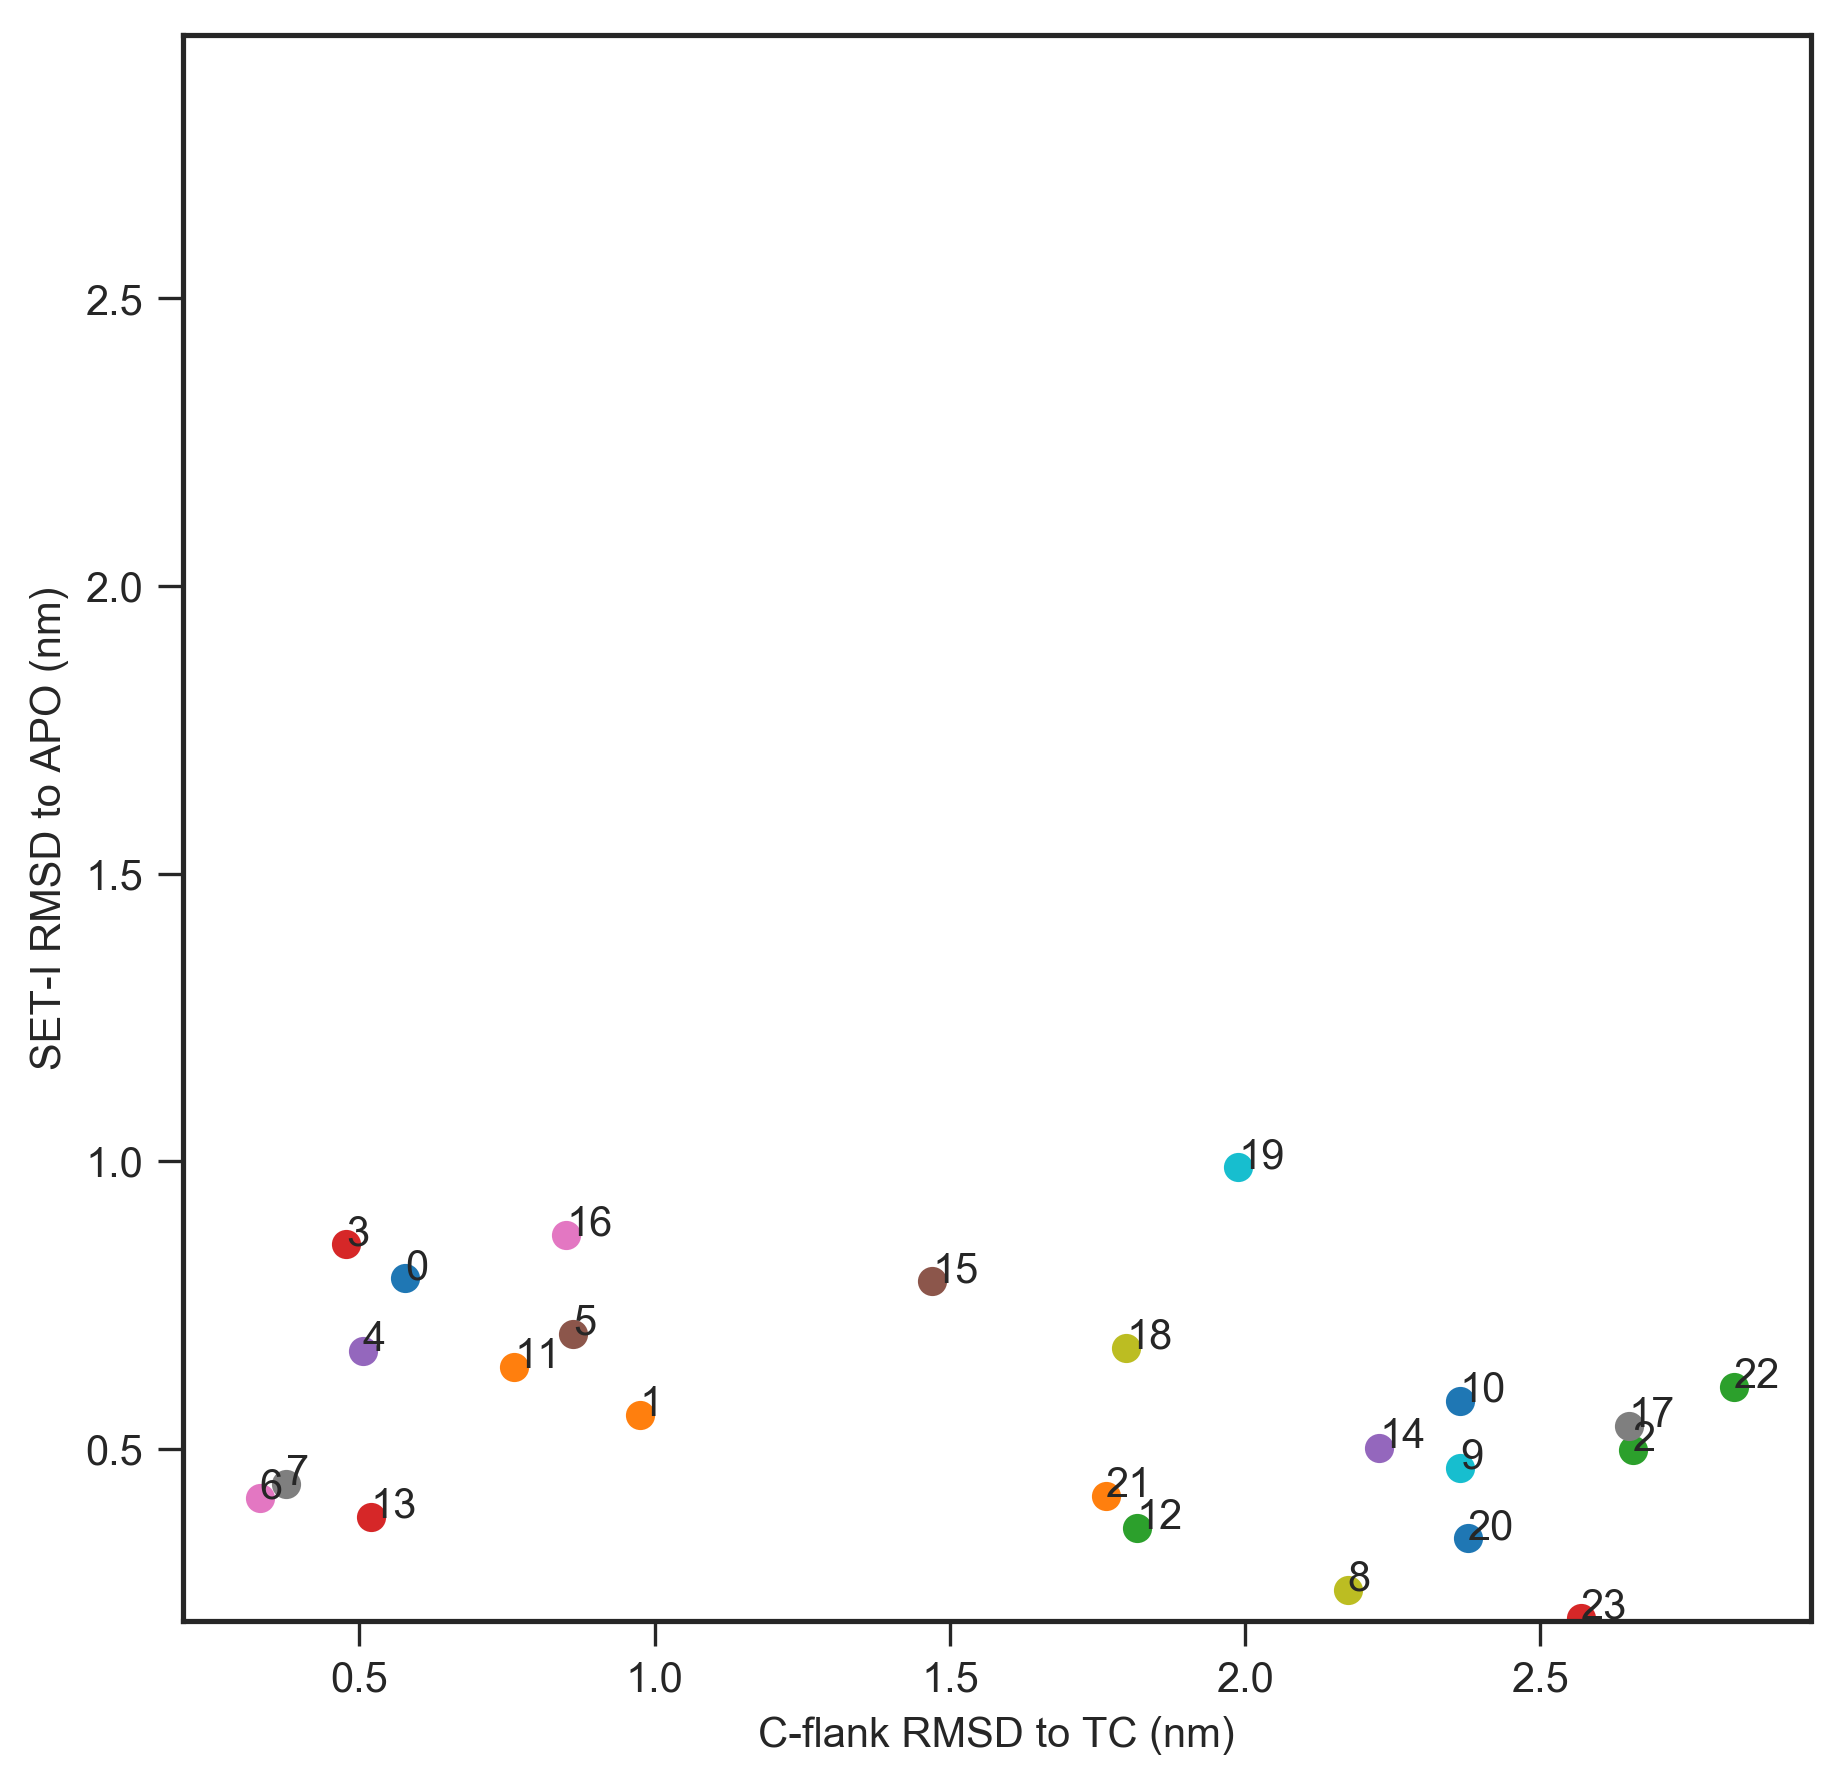

In [76]:
fig, ax = plt.subplots(figsize=(7,7), dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(cflank_rmsds[j][0][0], seti_rmsds[j][2][0])
    ax.annotate('%d' % i, (cflank_rmsds[j][0][0], seti_rmsds[j][2][0]))
plt.xlabel('C-flank RMSD to TC (nm)')
plt.ylabel('SET-I RMSD to APO (nm)')
xlim = ax.get_xlim()
ax.set_ylim(xlim)
plt.show()    

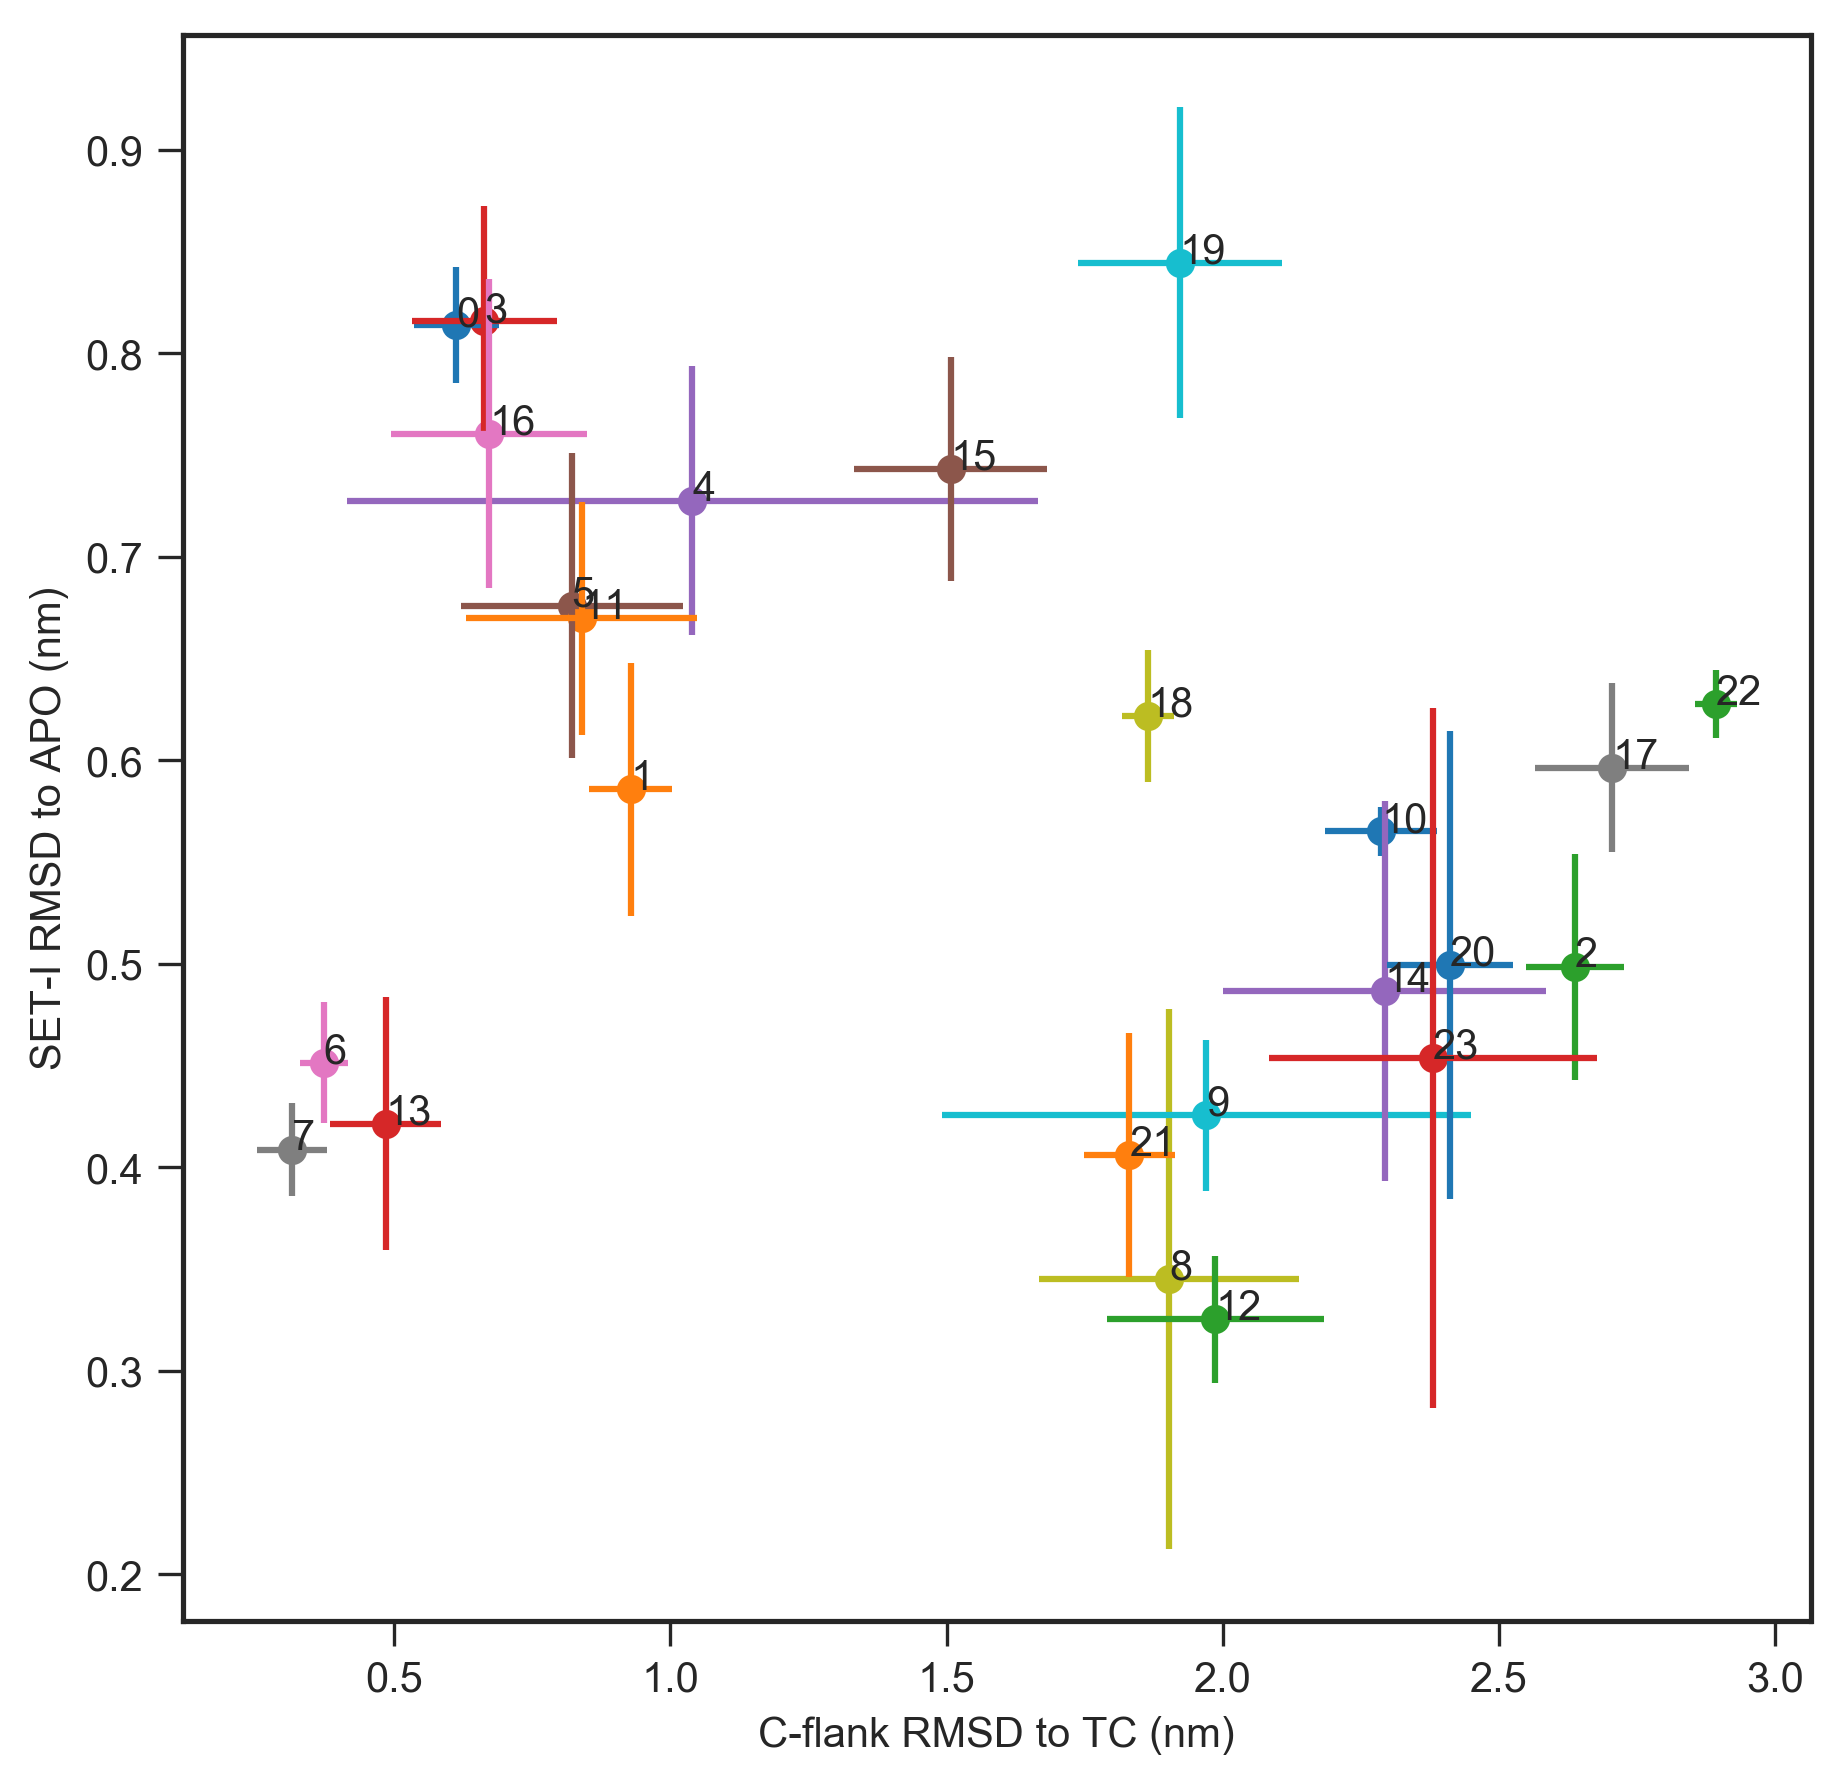

In [78]:
# also now instead of just top frame, do average of the top10

fig, ax = plt.subplots(figsize=(7,7), dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(np.mean(cflank_rmsds[j][0]), np.mean(seti_rmsds[j][2]))
    ax.annotate('%d' % i, (np.mean(cflank_rmsds[j][0]), np.mean(seti_rmsds[j][2])))
    ax.errorbar(np.mean(cflank_rmsds[j][0]), np.mean(seti_rmsds[j][2]), xerr=np.std(cflank_rmsds[j][0]), yerr=np.std(seti_rmsds[j][2]))
plt.xlabel('C-flank RMSD to TC (nm)')
plt.ylabel('SET-I RMSD to APO (nm)')
plt.show()    

In [83]:
j = np.argmax(meta_membs[:,23])
np.std(seti_rmsds[j][2])

0.17213687

In [62]:
# ok now plot these macrostates on the TICA landscapes as well

In [15]:
import glob
import numpy as np
import msmexplorer
import itertools

/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/rafalpwiewiora/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20

In [85]:
tica_trajs = glob.glob('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/tica/10_tics_trajs/*.npy')

In [87]:
tica_proj = []

for traj in tica_trajs:
    tica_proj.append(np.load(traj))
    
tica_proj_concat = np.concatenate(tica_proj)    

In [ ]:
combinations = itertools.combinations(range(10),2)

for i,j in combinations:

    plot_data = msmexplorer.plot_free_energy(tica_proj_concat, obs=(i,j), cbar=True, return_data=True)
    plt.close()
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.grid(False)
    ax.set_xlabel('tIC%d' % i)
    ax.set_ylabel('tIC%d' % j)
    vmin = -1E-12
    vmax = np.percentile(plot_data[1][2], 50)
    n_levels = 20
    alpha = 0.5
    im = ax.contourf(plot_data[1][0], plot_data[1][1], plot_data[1][2] - plot_data[1][2].min(),cmap=plt.get_cmap('spectral'),
                             levels=np.linspace(vmin, vmax, n_levels), alpha=alpha,
                             zorder=1, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel('Free energy (kcal/mol)')
    
    
    #plt.savefig('tica/landscapes_start_strs/tics_%d_%d.png' % (i,j), dpi=300)
    plt.close()

In [4]:
# actually forget TICA for now - look at MDS embedding of RMSD, then 3D whole-protein RMSD figure
# for this calculate RMSD of every macrostate representative structure, to every other + 3 crystal structures - 
# so 27 x 27 matrix, then MSD that

In [9]:
rmsd_matrix = np.zeros((27,27))

In [10]:
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    for k in range(24):
        z = np.argmax(meta_membs[:,k])
        rmsd_matrix[i,k] = md.rmsd(cluster_top10_ca[j][0], cluster_top10_ca[z][0])
        
    # now crystal structures
    rmsd_matrix[i, 24] = md.rmsd(cluster_top10_ca[j][0], zkk_ca)
    rmsd_matrix[i, 25] = md.rmsd(cluster_top10_ca[j][0], ij8_ca)
    rmsd_matrix[i, 26] = md.rmsd(cluster_top10_ca[j][0], apo_ca)
    
# zkk_ca
for k in range(24):
    z = np.argmax(meta_membs[:,k])
    rmsd_matrix[24,k] = md.rmsd(cluster_top10_ca[z][0], zkk_ca)
rmsd_matrix[24, 24] = md.rmsd(zkk_ca, zkk_ca)
rmsd_matrix[24, 25] = md.rmsd(zkk_ca, ij8_ca)
rmsd_matrix[24, 26] = md.rmsd(zkk_ca, apo_ca) 

# ij8_ca
for k in range(24):
    z = np.argmax(meta_membs[:,k])
    rmsd_matrix[25,k] = md.rmsd(cluster_top10_ca[z][0], ij8_ca)
rmsd_matrix[25, 24] = md.rmsd(ij8_ca, zkk_ca)
rmsd_matrix[25, 25] = md.rmsd(ij8_ca, ij8_ca)
rmsd_matrix[25, 26] = md.rmsd(ij8_ca, apo_ca)

# apo_ca
for k in range(24):
    z = np.argmax(meta_membs[:,k])
    rmsd_matrix[26,k] = md.rmsd(cluster_top10_ca[z][0], apo_ca)
rmsd_matrix[26, 24] = md.rmsd(apo_ca, zkk_ca)
rmsd_matrix[26, 25] = md.rmsd(apo_ca, ij8_ca)
rmsd_matrix[26, 26] = md.rmsd(apo_ca, apo_ca)

In [17]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

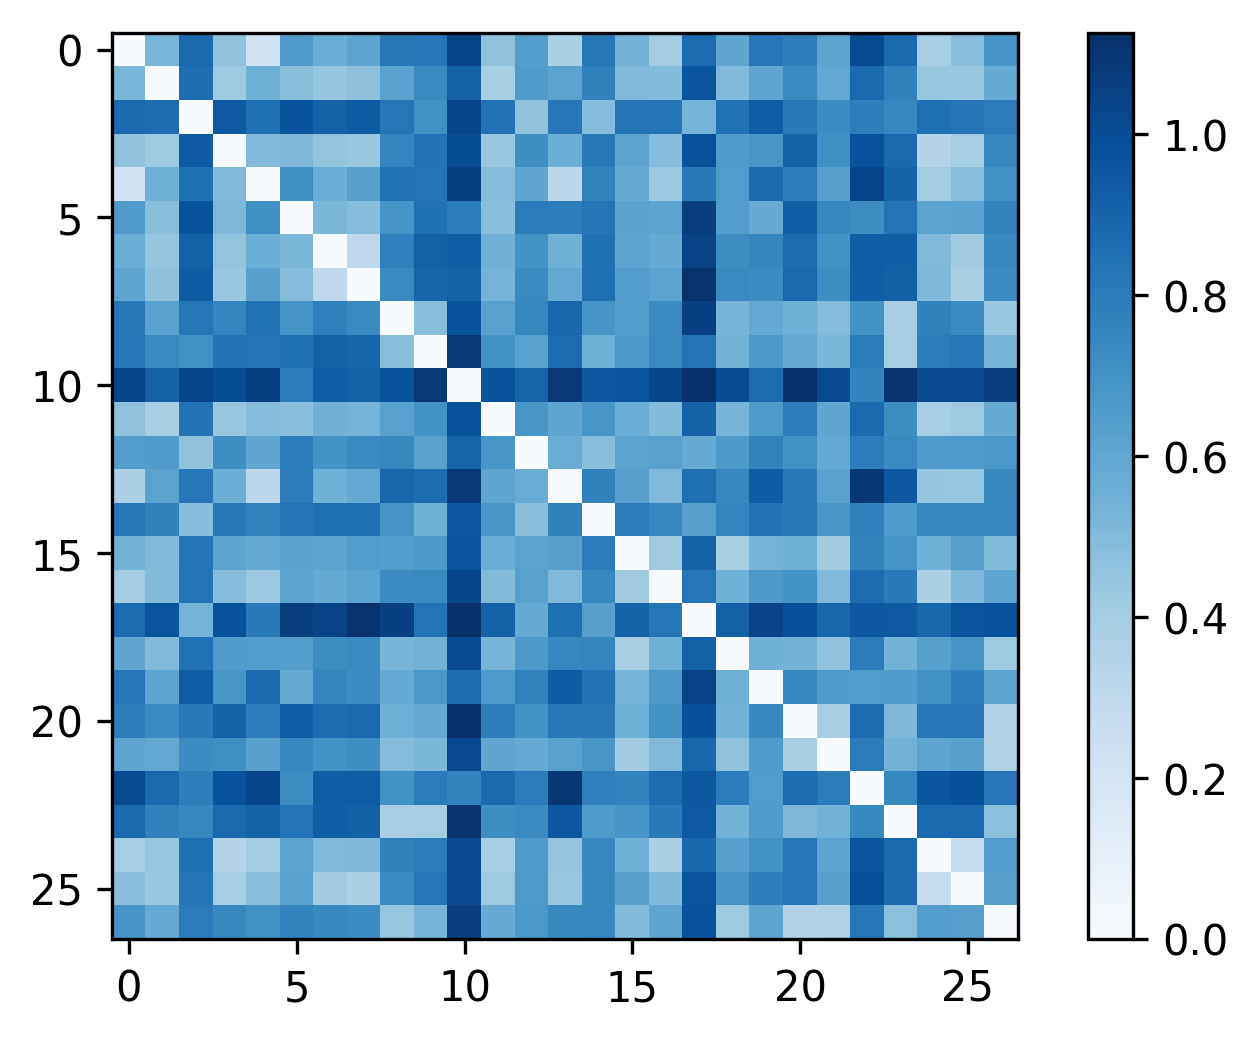

In [27]:
plt.figure(dpi=300)
plt.imshow(rmsd_matrix, cmap='Blues')
plt.colorbar()
plt.show()

In [28]:
# now do MDS

In [7]:
import sklearn
import sklearn.manifold

In [33]:
mds = sklearn.manifold.MDS(dissimilarity='precomputed')

In [34]:
projection = mds.fit_transform(rmsd_matrix)

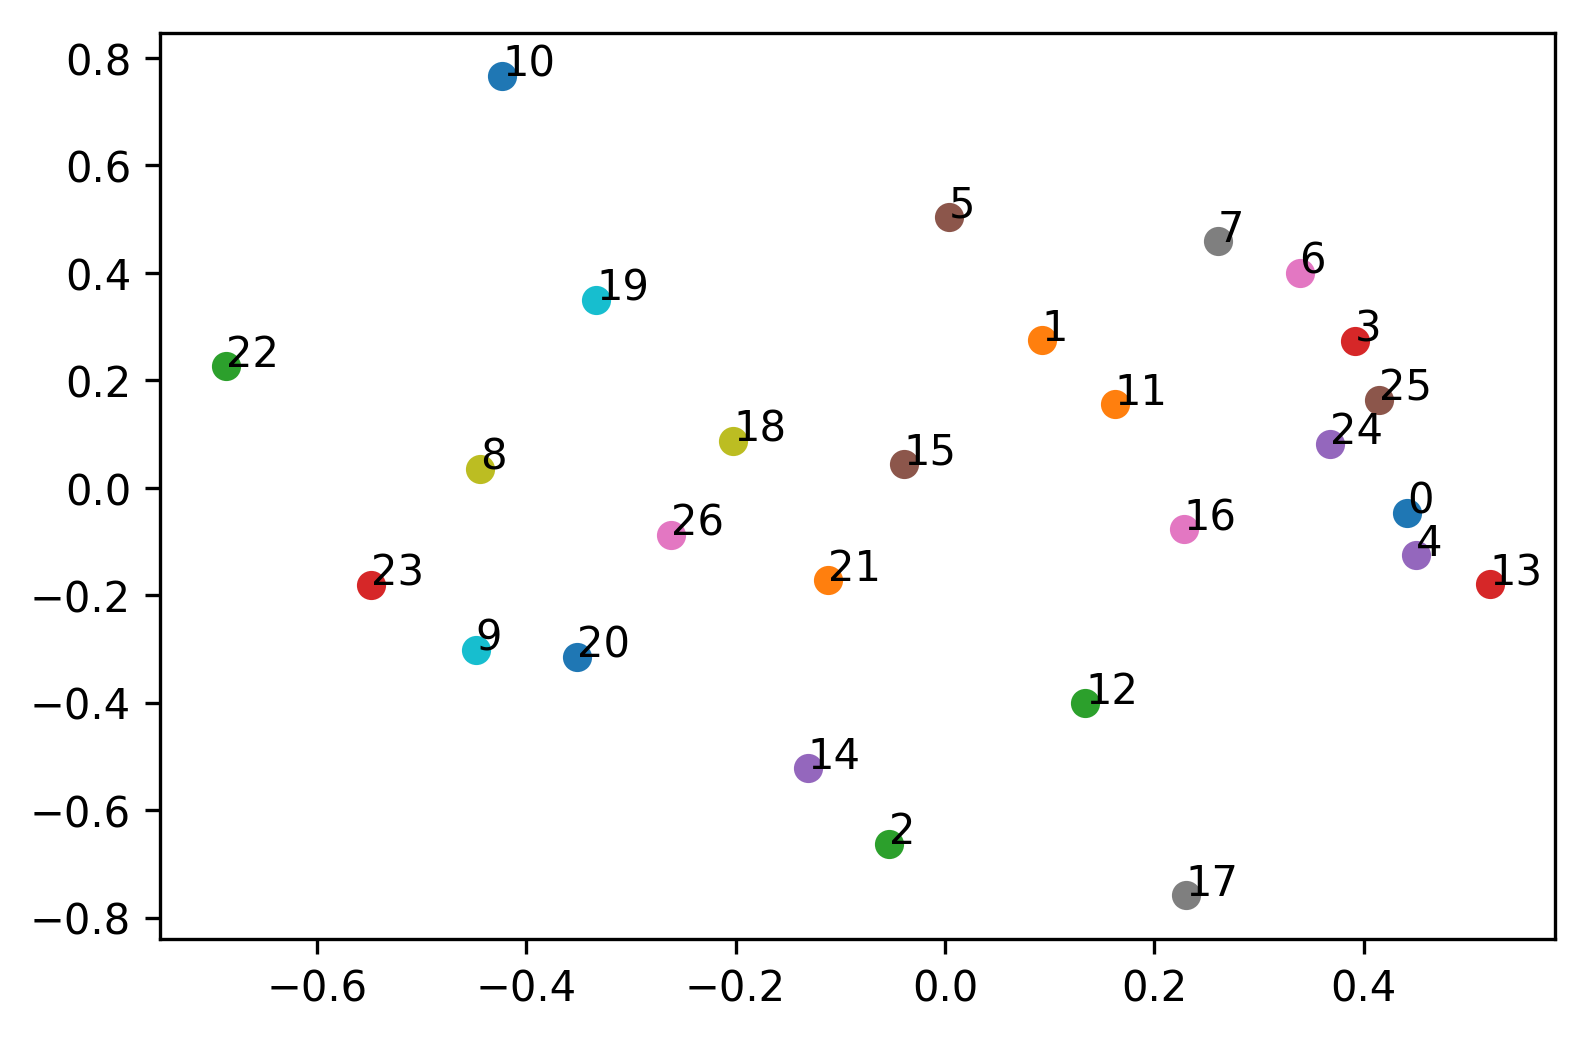

In [38]:
plt.figure(dpi=300)

for index, i in enumerate(projection):
    plt.scatter(i[0], i[1])
    plt.annotate('%d' % index, (i[0], i[1]))
    
plt.show()    

In [45]:
# do this 50 times

In [46]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [12]:
for j in range(50):
    mds = sklearn.manifold.MDS(dissimilarity='precomputed')
    projection = mds.fit_transform(rmsd_matrix)
    plt.figure(dpi=300)

    for index, i in enumerate(projection):
        plt.scatter(i[0], i[1])
        plt.annotate('%d' % index, (i[0], i[1]))
    
    plt.savefig('rmsd_mds/%d.png' % j, dpi=300)
    plt.close()

In [13]:
# now 3D plots of whole protein RMSD

In [ ]:
# try zkk - ij8, whole protein
#fig, ax = plt.subplots(dpi=300)
#for i in range(24):
#    j = np.argmax(meta_membs[:,i])
#    ax.scatter(whole_rmsds[j][0][0], whole_rmsds[j][1][0])
#    ax.annotate('%d' % i, (whole_rmsds[j][0][0], whole_rmsds[j][1][0]))
#plt.xlabel('RMSD to TC (nm)')
#plt.ylabel('RMSD to BC-SAM (nm)')
#plt.title('C-alpha whole protein RMSD')
#plt.show()    

In [18]:
import seaborn as sns
sns.set_style('ticks')

In [19]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

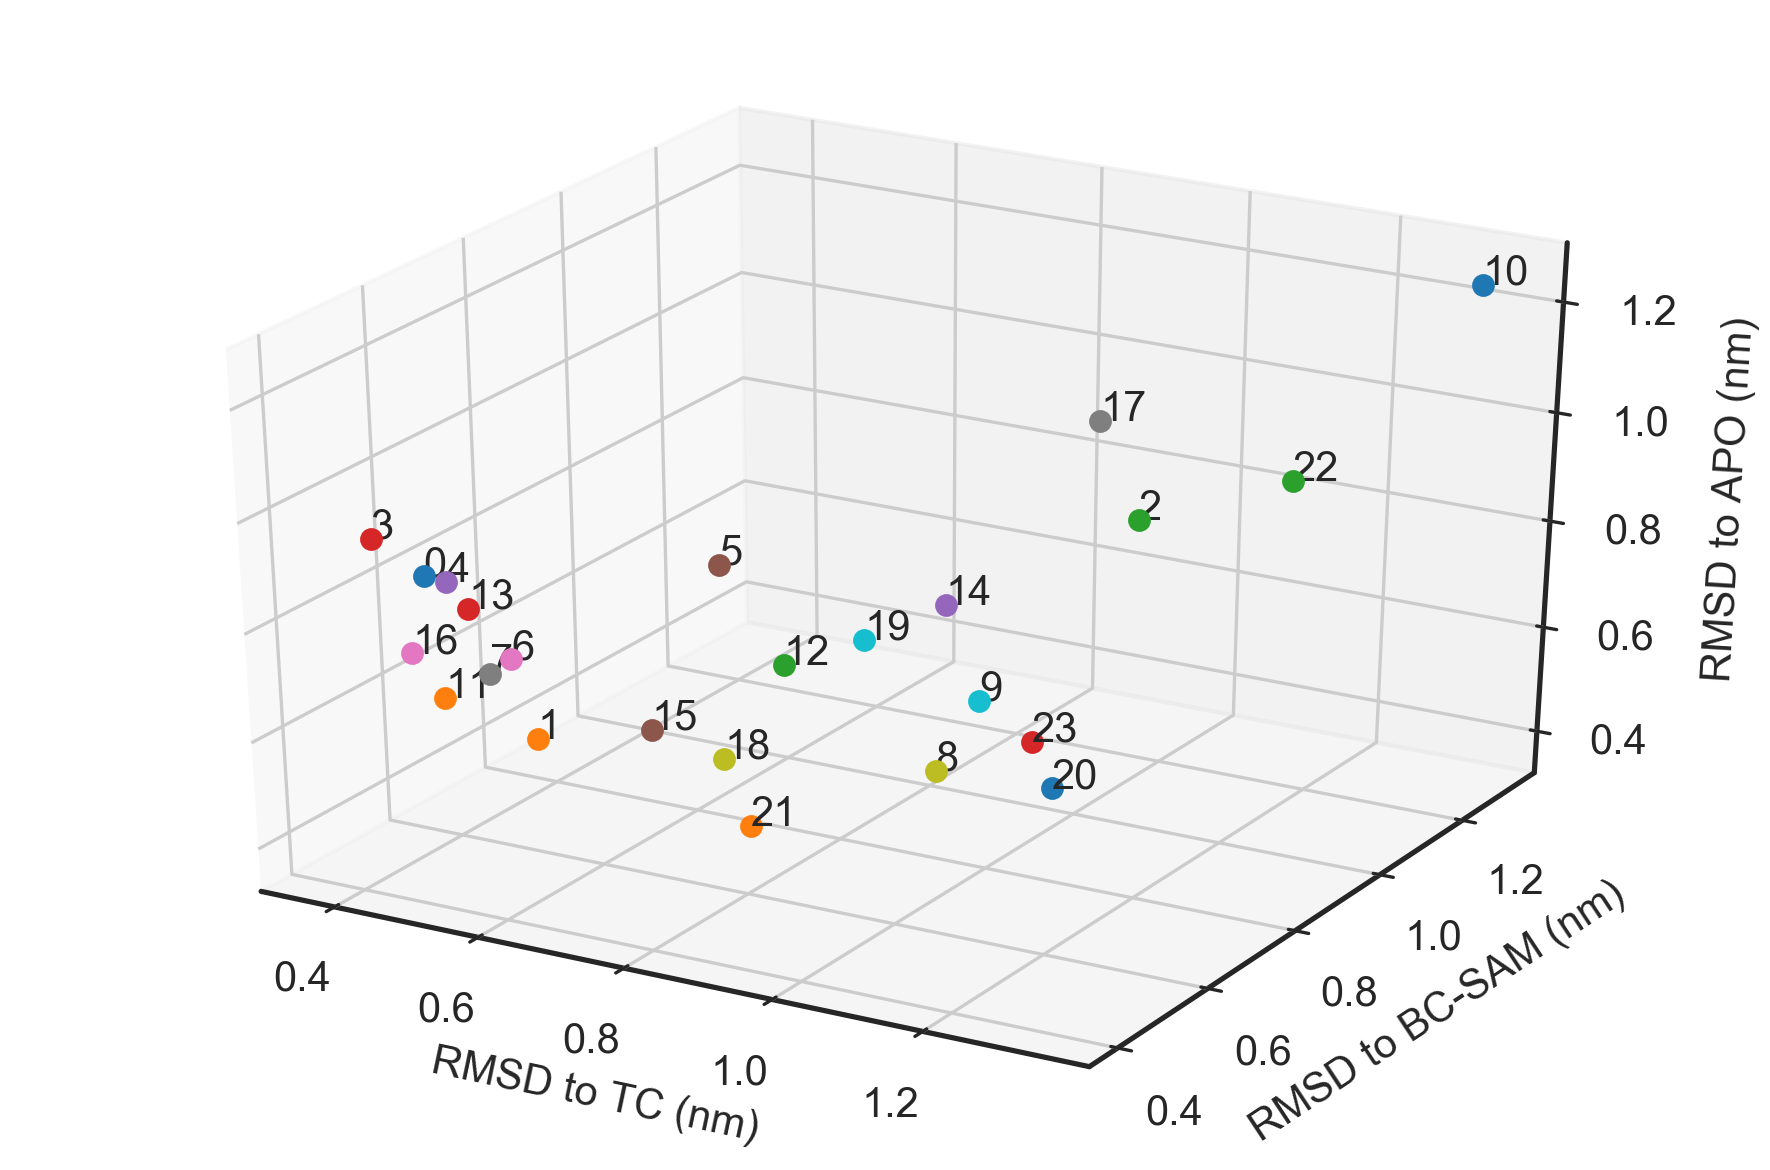

In [40]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][0][0], whole_rmsds[j][1][0], whole_rmsds[j][2][0])
    ax.text(whole_rmsds[j][0][0], whole_rmsds[j][1][0], whole_rmsds[j][2][0], '%d' % i)
ax.set_xlabel('RMSD to TC (nm)')
ax.set_ylabel('RMSD to BC-SAM (nm)')
ax.set_zlabel('RMSD to APO (nm)')
plt.tight_layout()
plt.savefig('rmsd_3d/1.png', dpi=300)
plt.show()

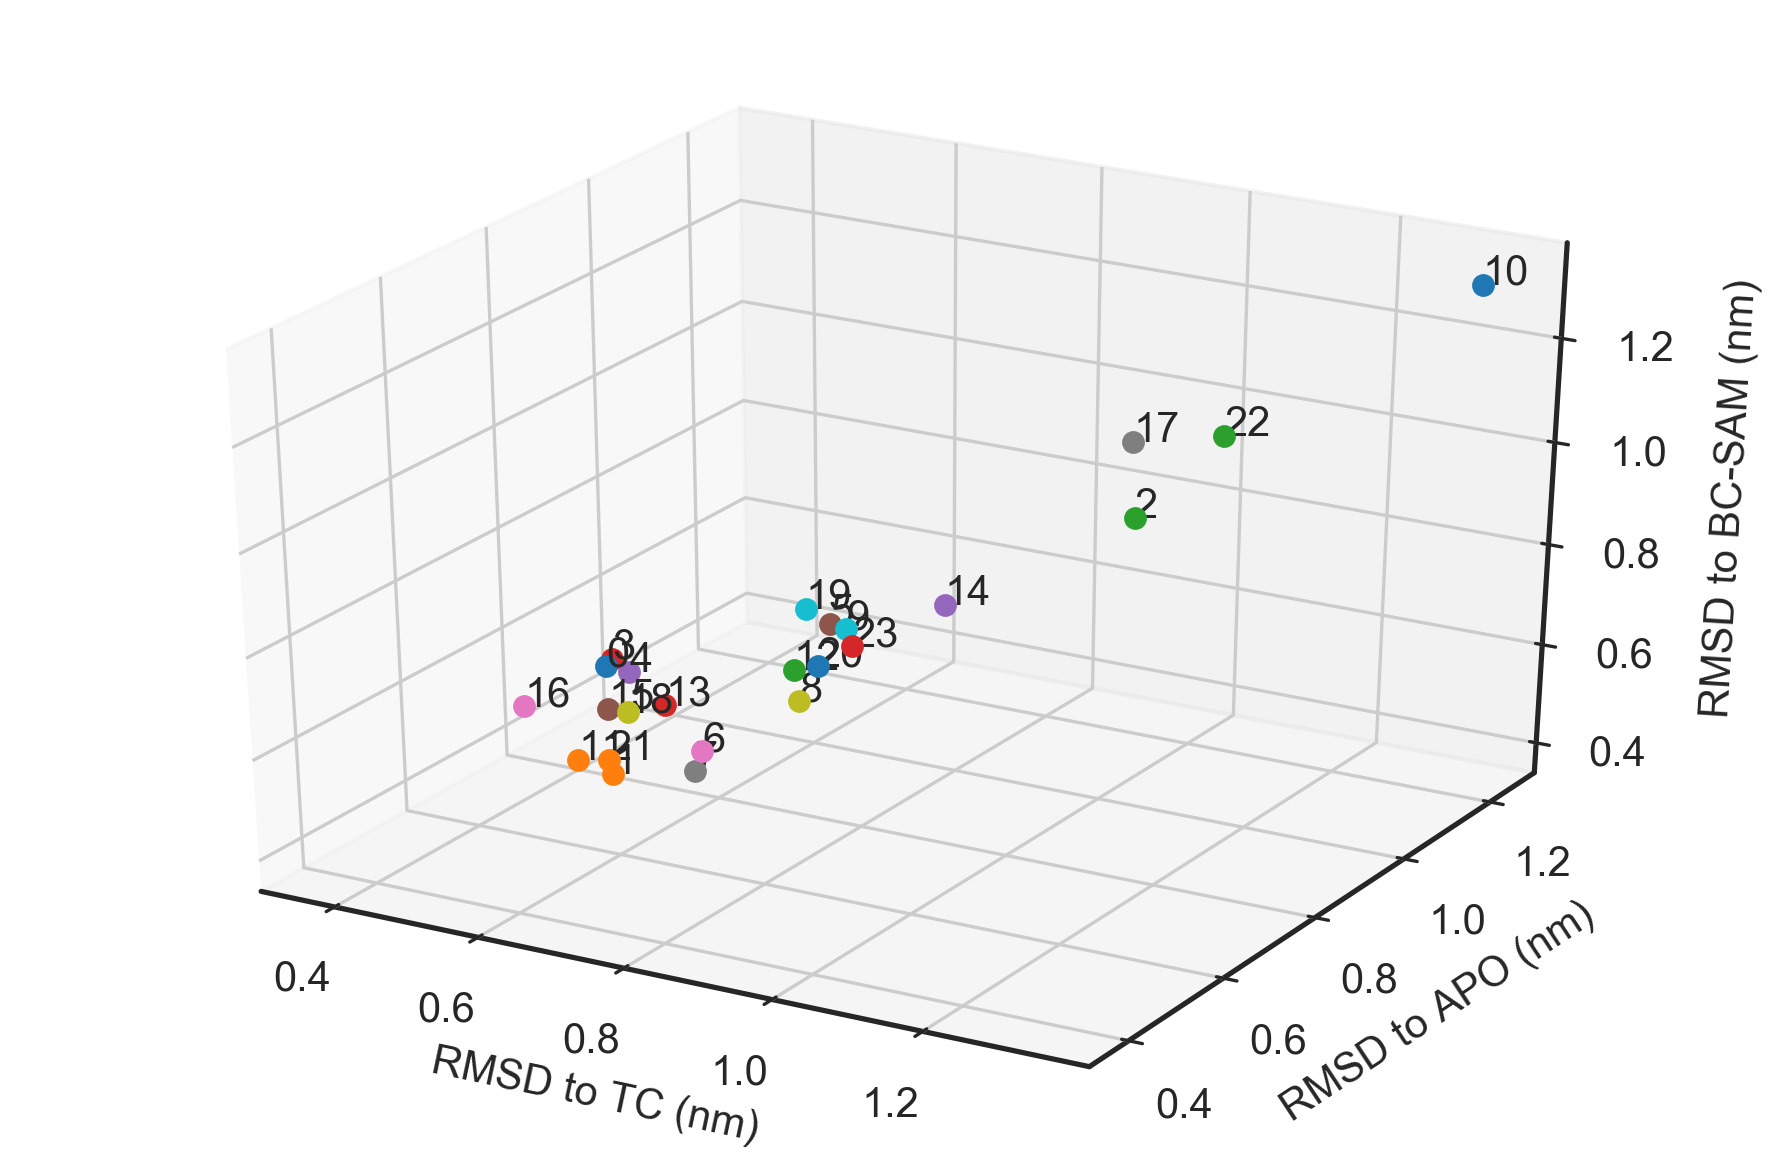

In [41]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][0][0], whole_rmsds[j][2][0], whole_rmsds[j][1][0])
    ax.text(whole_rmsds[j][0][0], whole_rmsds[j][2][0], whole_rmsds[j][1][0], '%d' % i)
ax.set_xlabel('RMSD to TC (nm)')
ax.set_ylabel('RMSD to APO (nm)')
ax.set_zlabel('RMSD to BC-SAM (nm)')
plt.tight_layout()
plt.savefig('rmsd_3d/2.png', dpi=300)
plt.show()

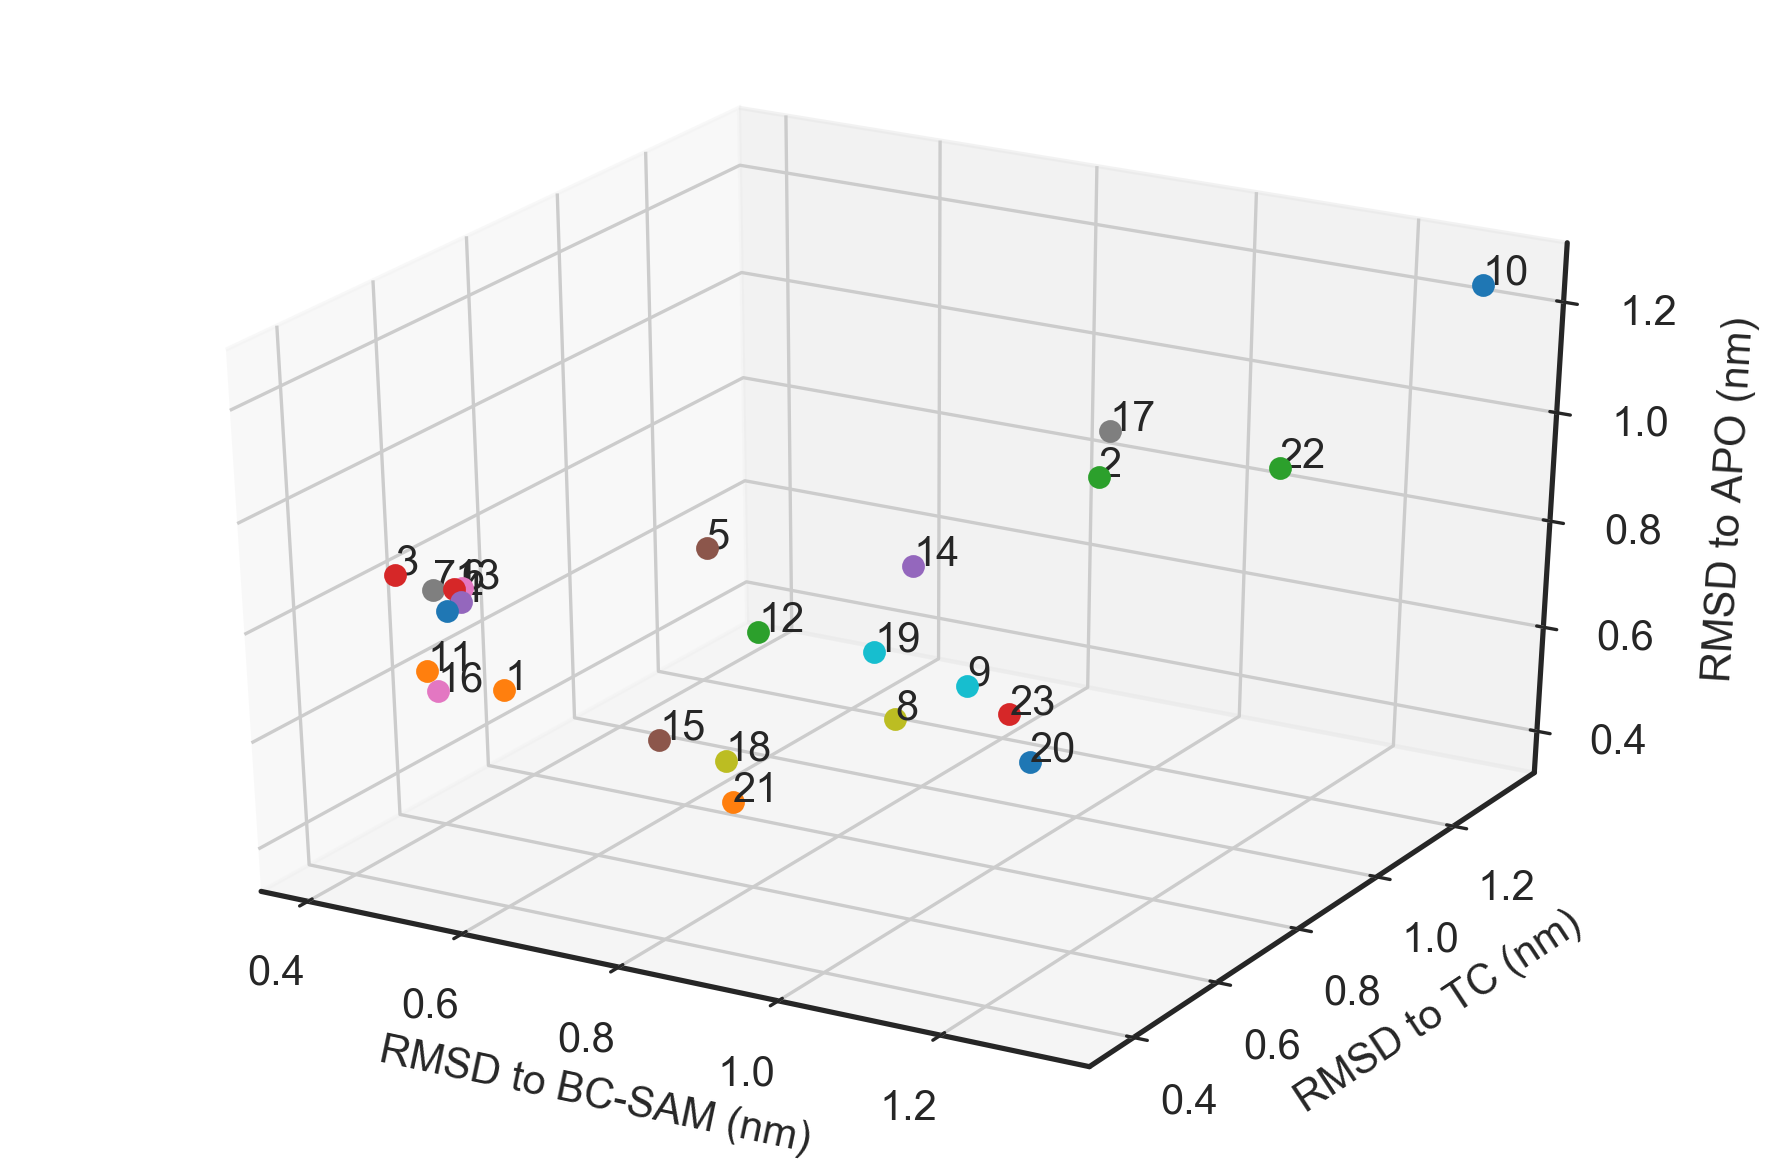

In [42]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][1][0], whole_rmsds[j][0][0], whole_rmsds[j][2][0])
    ax.text(whole_rmsds[j][1][0], whole_rmsds[j][0][0], whole_rmsds[j][2][0], '%d' % i)
ax.set_xlabel('RMSD to BC-SAM (nm)')
ax.set_ylabel('RMSD to TC (nm)')
ax.set_zlabel('RMSD to APO (nm)')
plt.tight_layout()
plt.savefig('rmsd_3d/3.png', dpi=300)
plt.show()

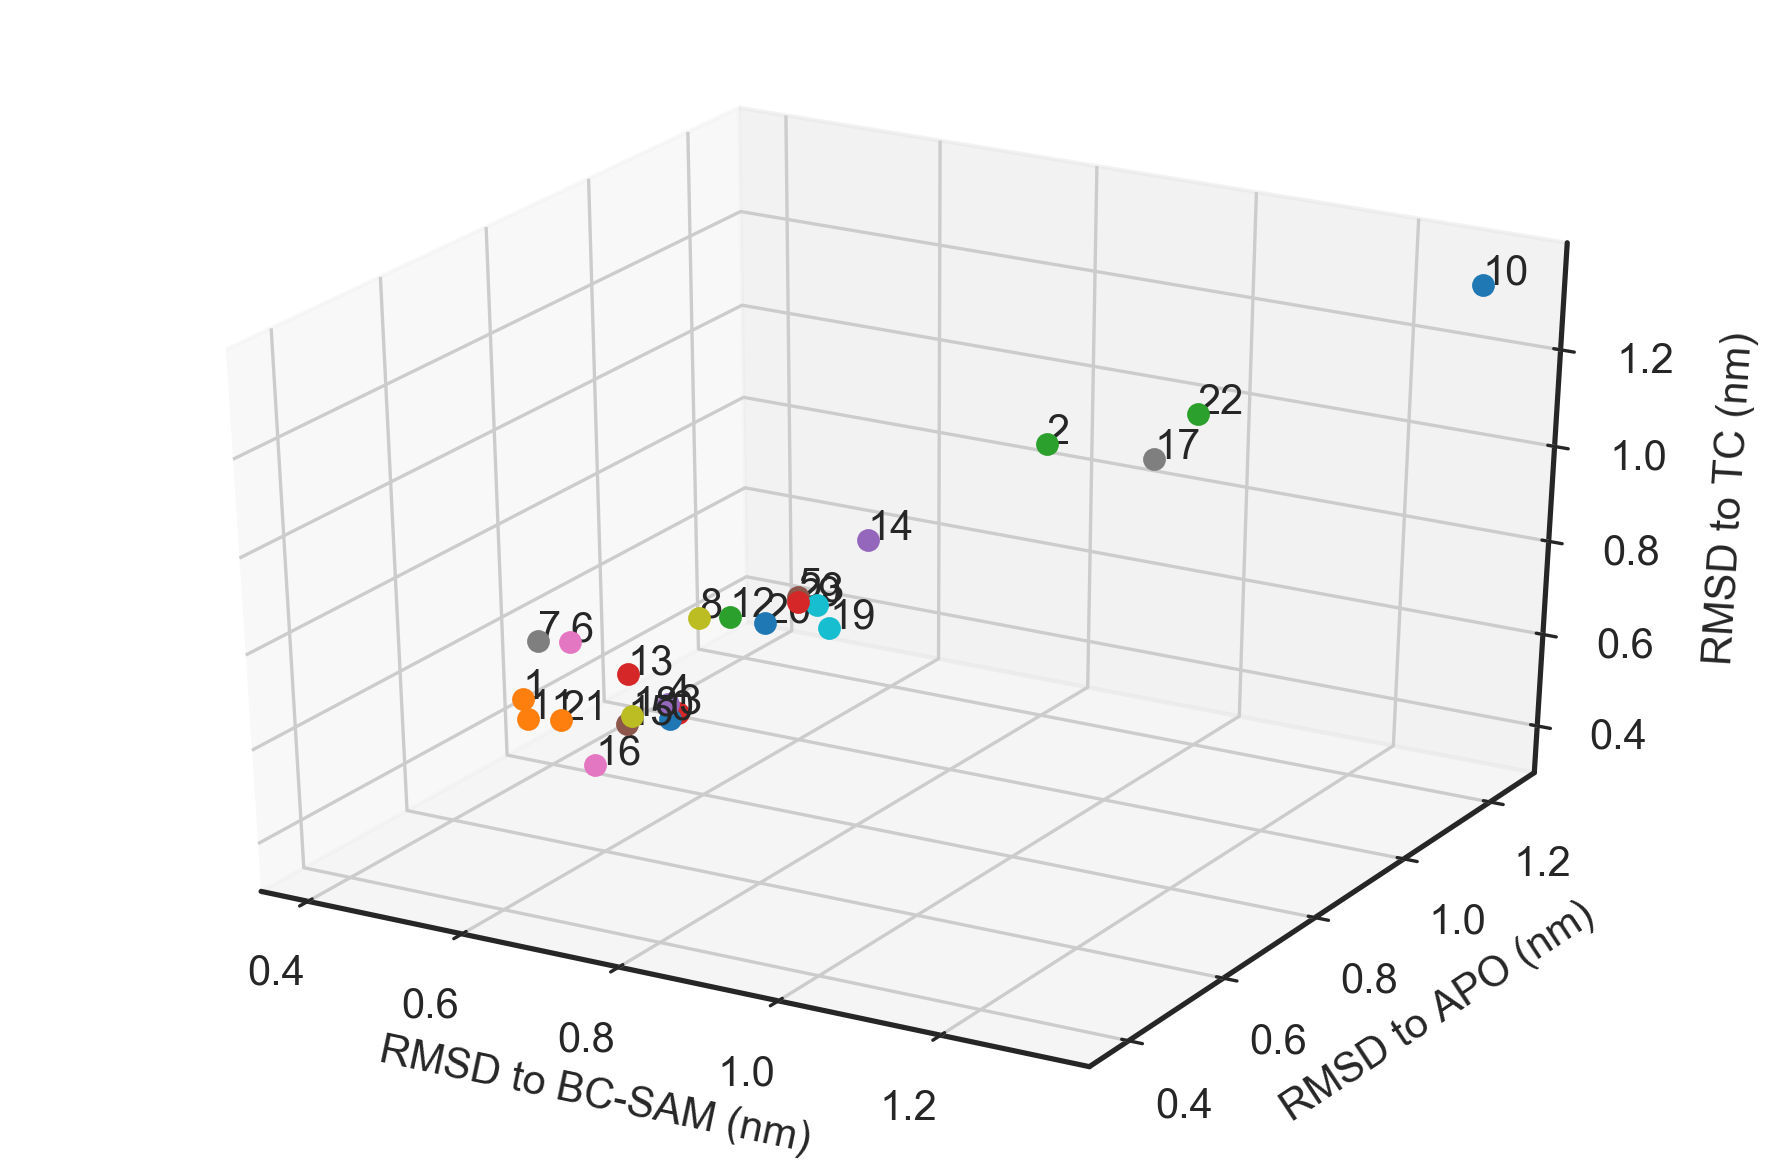

In [43]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][1][0], whole_rmsds[j][2][0], whole_rmsds[j][0][0])
    ax.text(whole_rmsds[j][1][0], whole_rmsds[j][2][0], whole_rmsds[j][0][0], '%d' % i)
ax.set_xlabel('RMSD to BC-SAM (nm)')
ax.set_ylabel('RMSD to APO (nm)')
ax.set_zlabel('RMSD to TC (nm)')
plt.tight_layout()
plt.savefig('rmsd_3d/4.png', dpi=300)
plt.show()

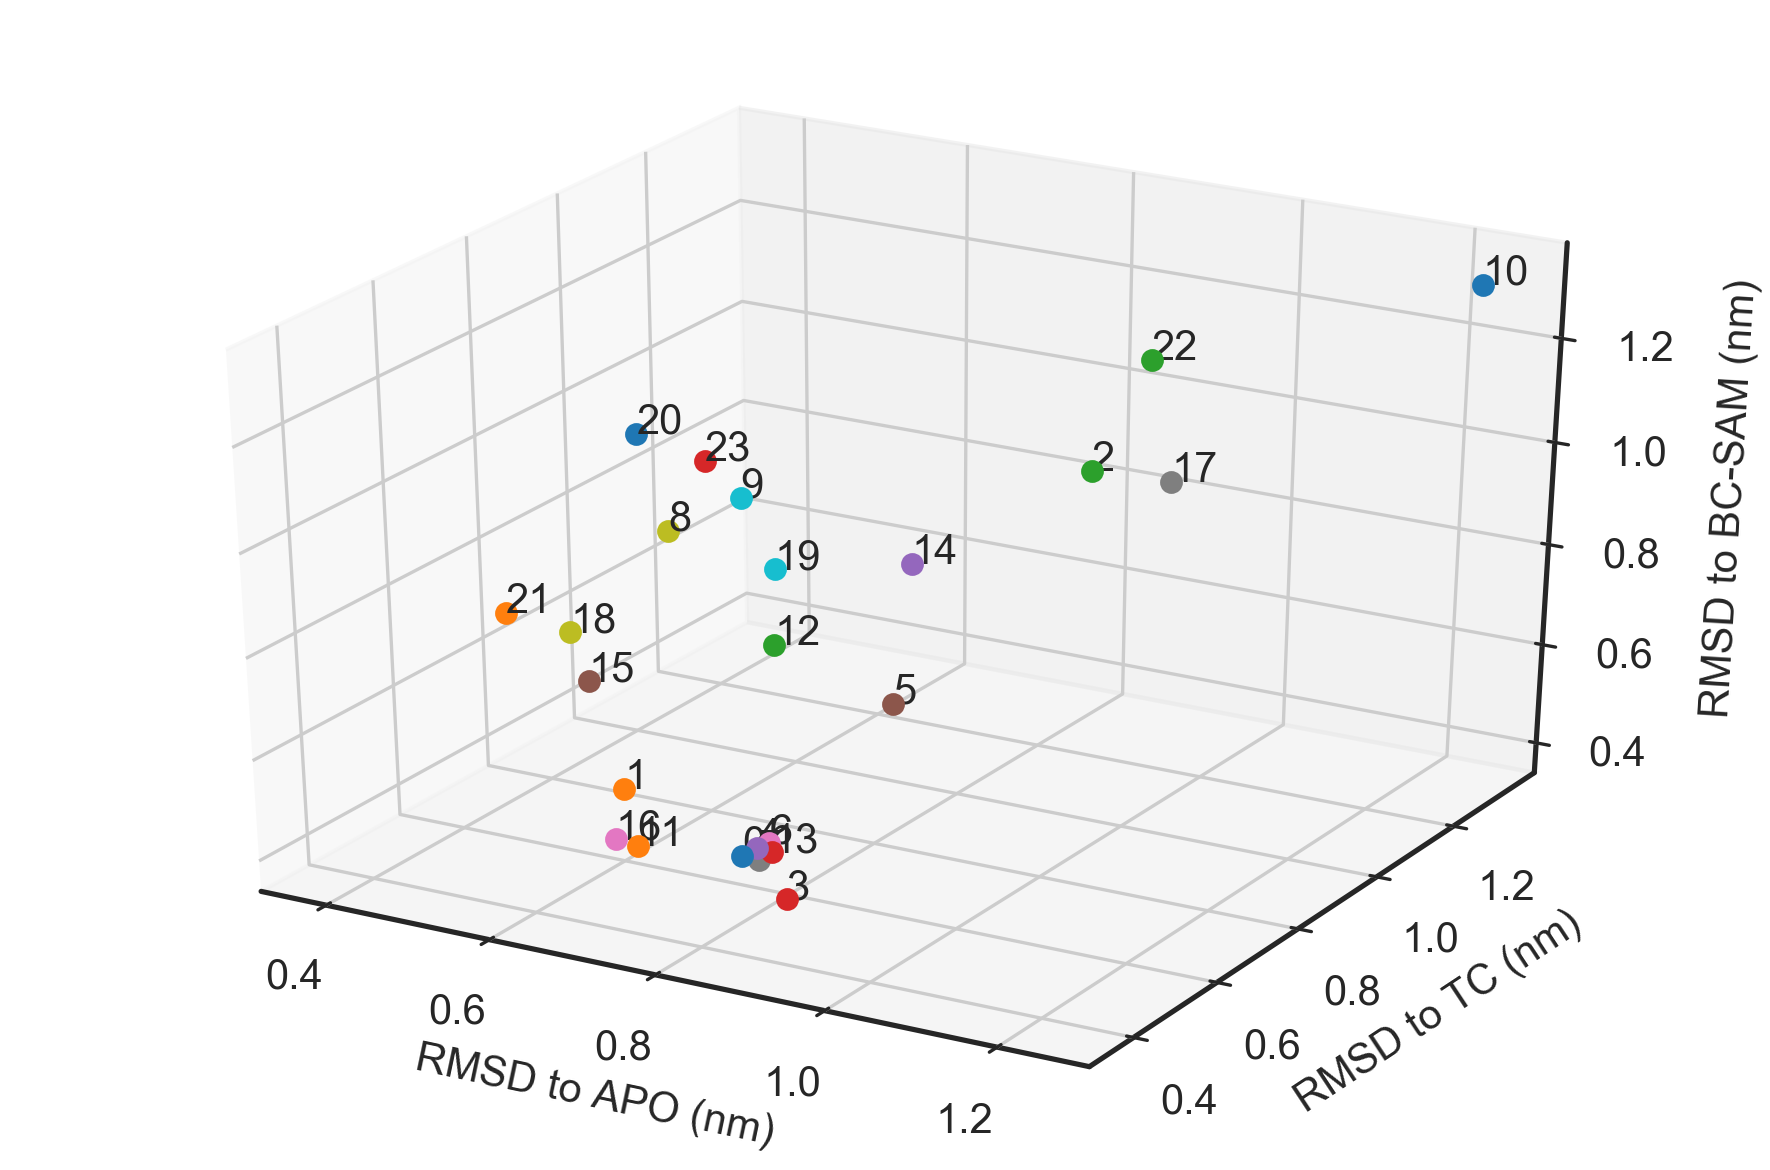

In [44]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][2][0], whole_rmsds[j][0][0], whole_rmsds[j][1][0])
    ax.text(whole_rmsds[j][2][0], whole_rmsds[j][0][0], whole_rmsds[j][1][0], '%d' % i)
ax.set_xlabel('RMSD to APO (nm)')
ax.set_ylabel('RMSD to TC (nm)')
ax.set_zlabel('RMSD to BC-SAM (nm)')
plt.tight_layout()
plt.savefig('rmsd_3d/5.png', dpi=300)
plt.show()

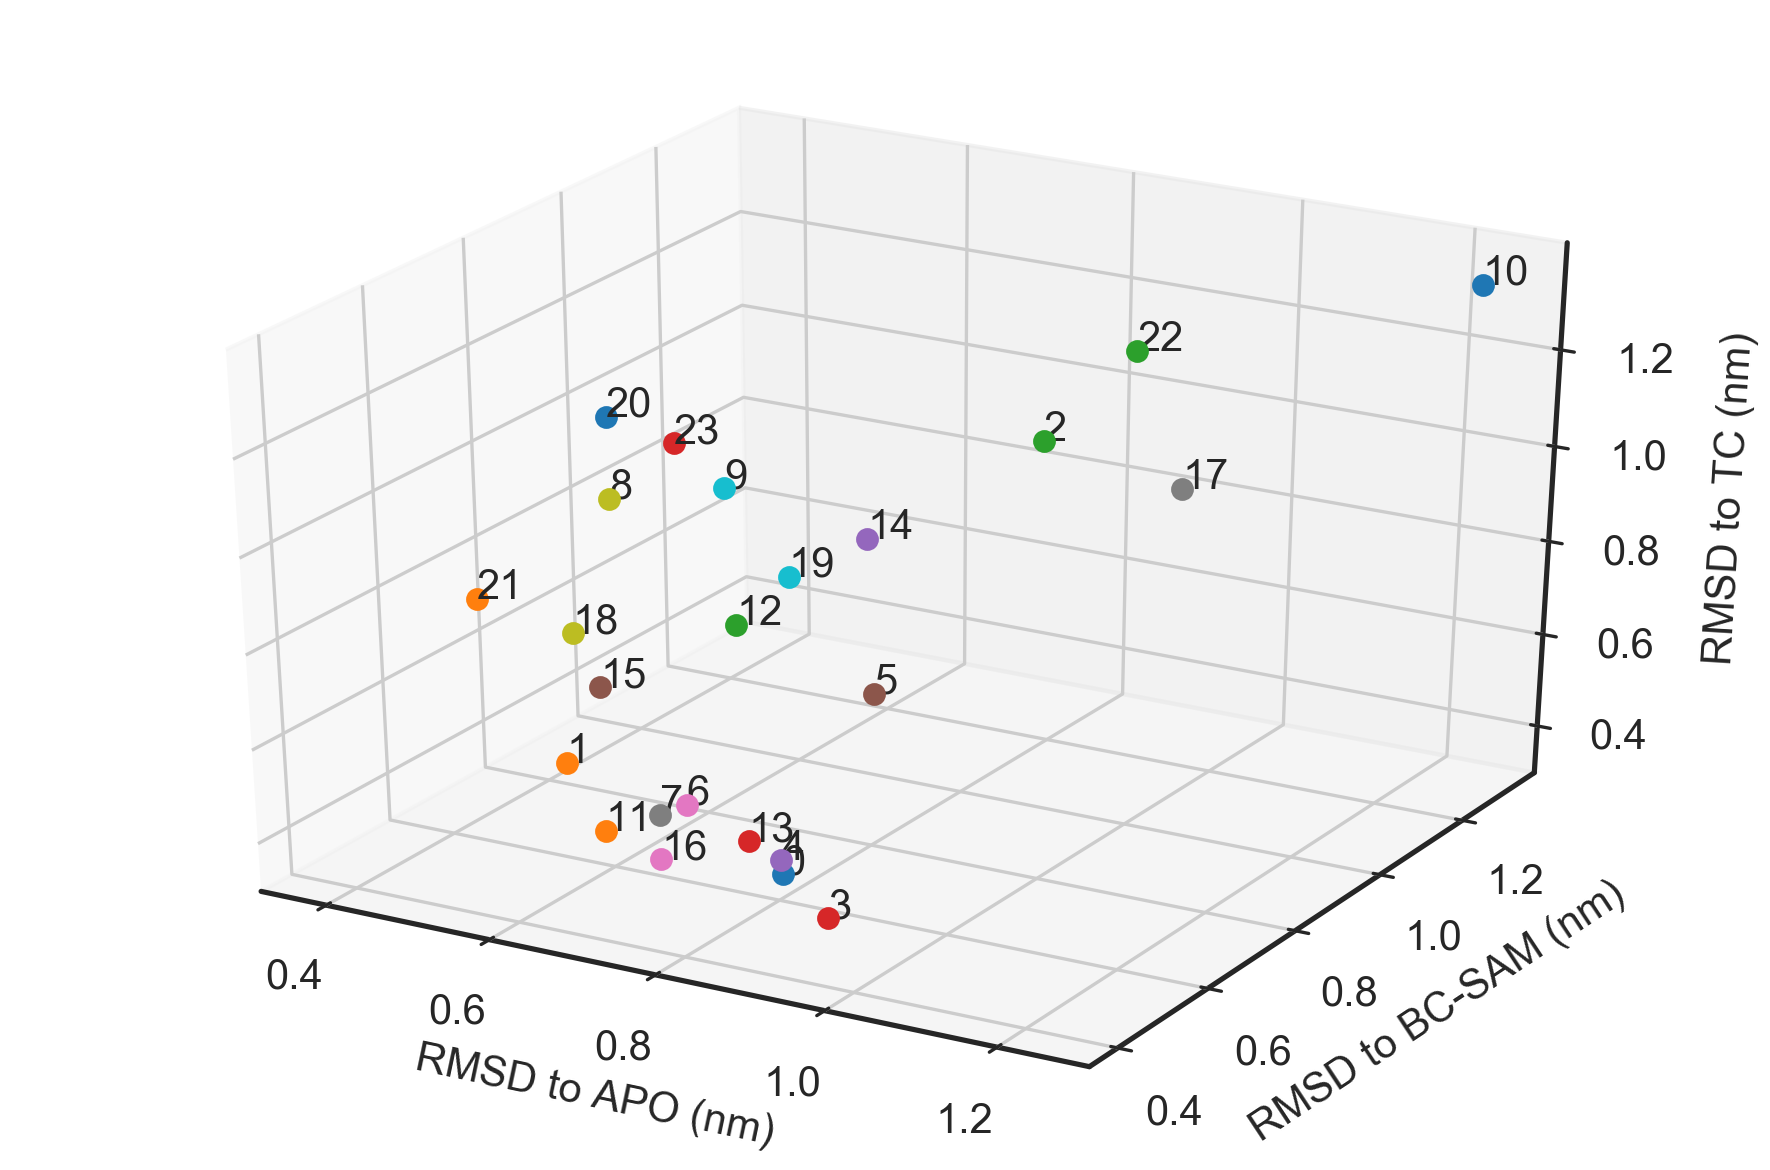

In [45]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(whole_rmsds[j][2][0], whole_rmsds[j][1][0], whole_rmsds[j][0][0])
    ax.text(whole_rmsds[j][2][0], whole_rmsds[j][1][0], whole_rmsds[j][0][0], '%d' % i)
ax.set_xlabel('RMSD to APO (nm)')
ax.set_ylabel('RMSD to BC-SAM (nm)')
ax.set_zlabel('RMSD to TC (nm)')
plt.tight_layout()
plt.savefig('rmsd_3d/6.png', dpi=300)
plt.show()

In [11]:
##########
# now do C-flank to TC vs Pymol SET-I angle to TC

In [19]:
seti_angles = [15.13, 13.06, 50.3, 8.5, 26.81, 7.93, 19.59, 16.33, 54.76, 19.97, 13.76, 31.11, 35.84, 37.66, 56.86, 14.45, 40.19, 8.88, 4.58, 15.31, 57.92, 46.76, 13.7, 47.34]

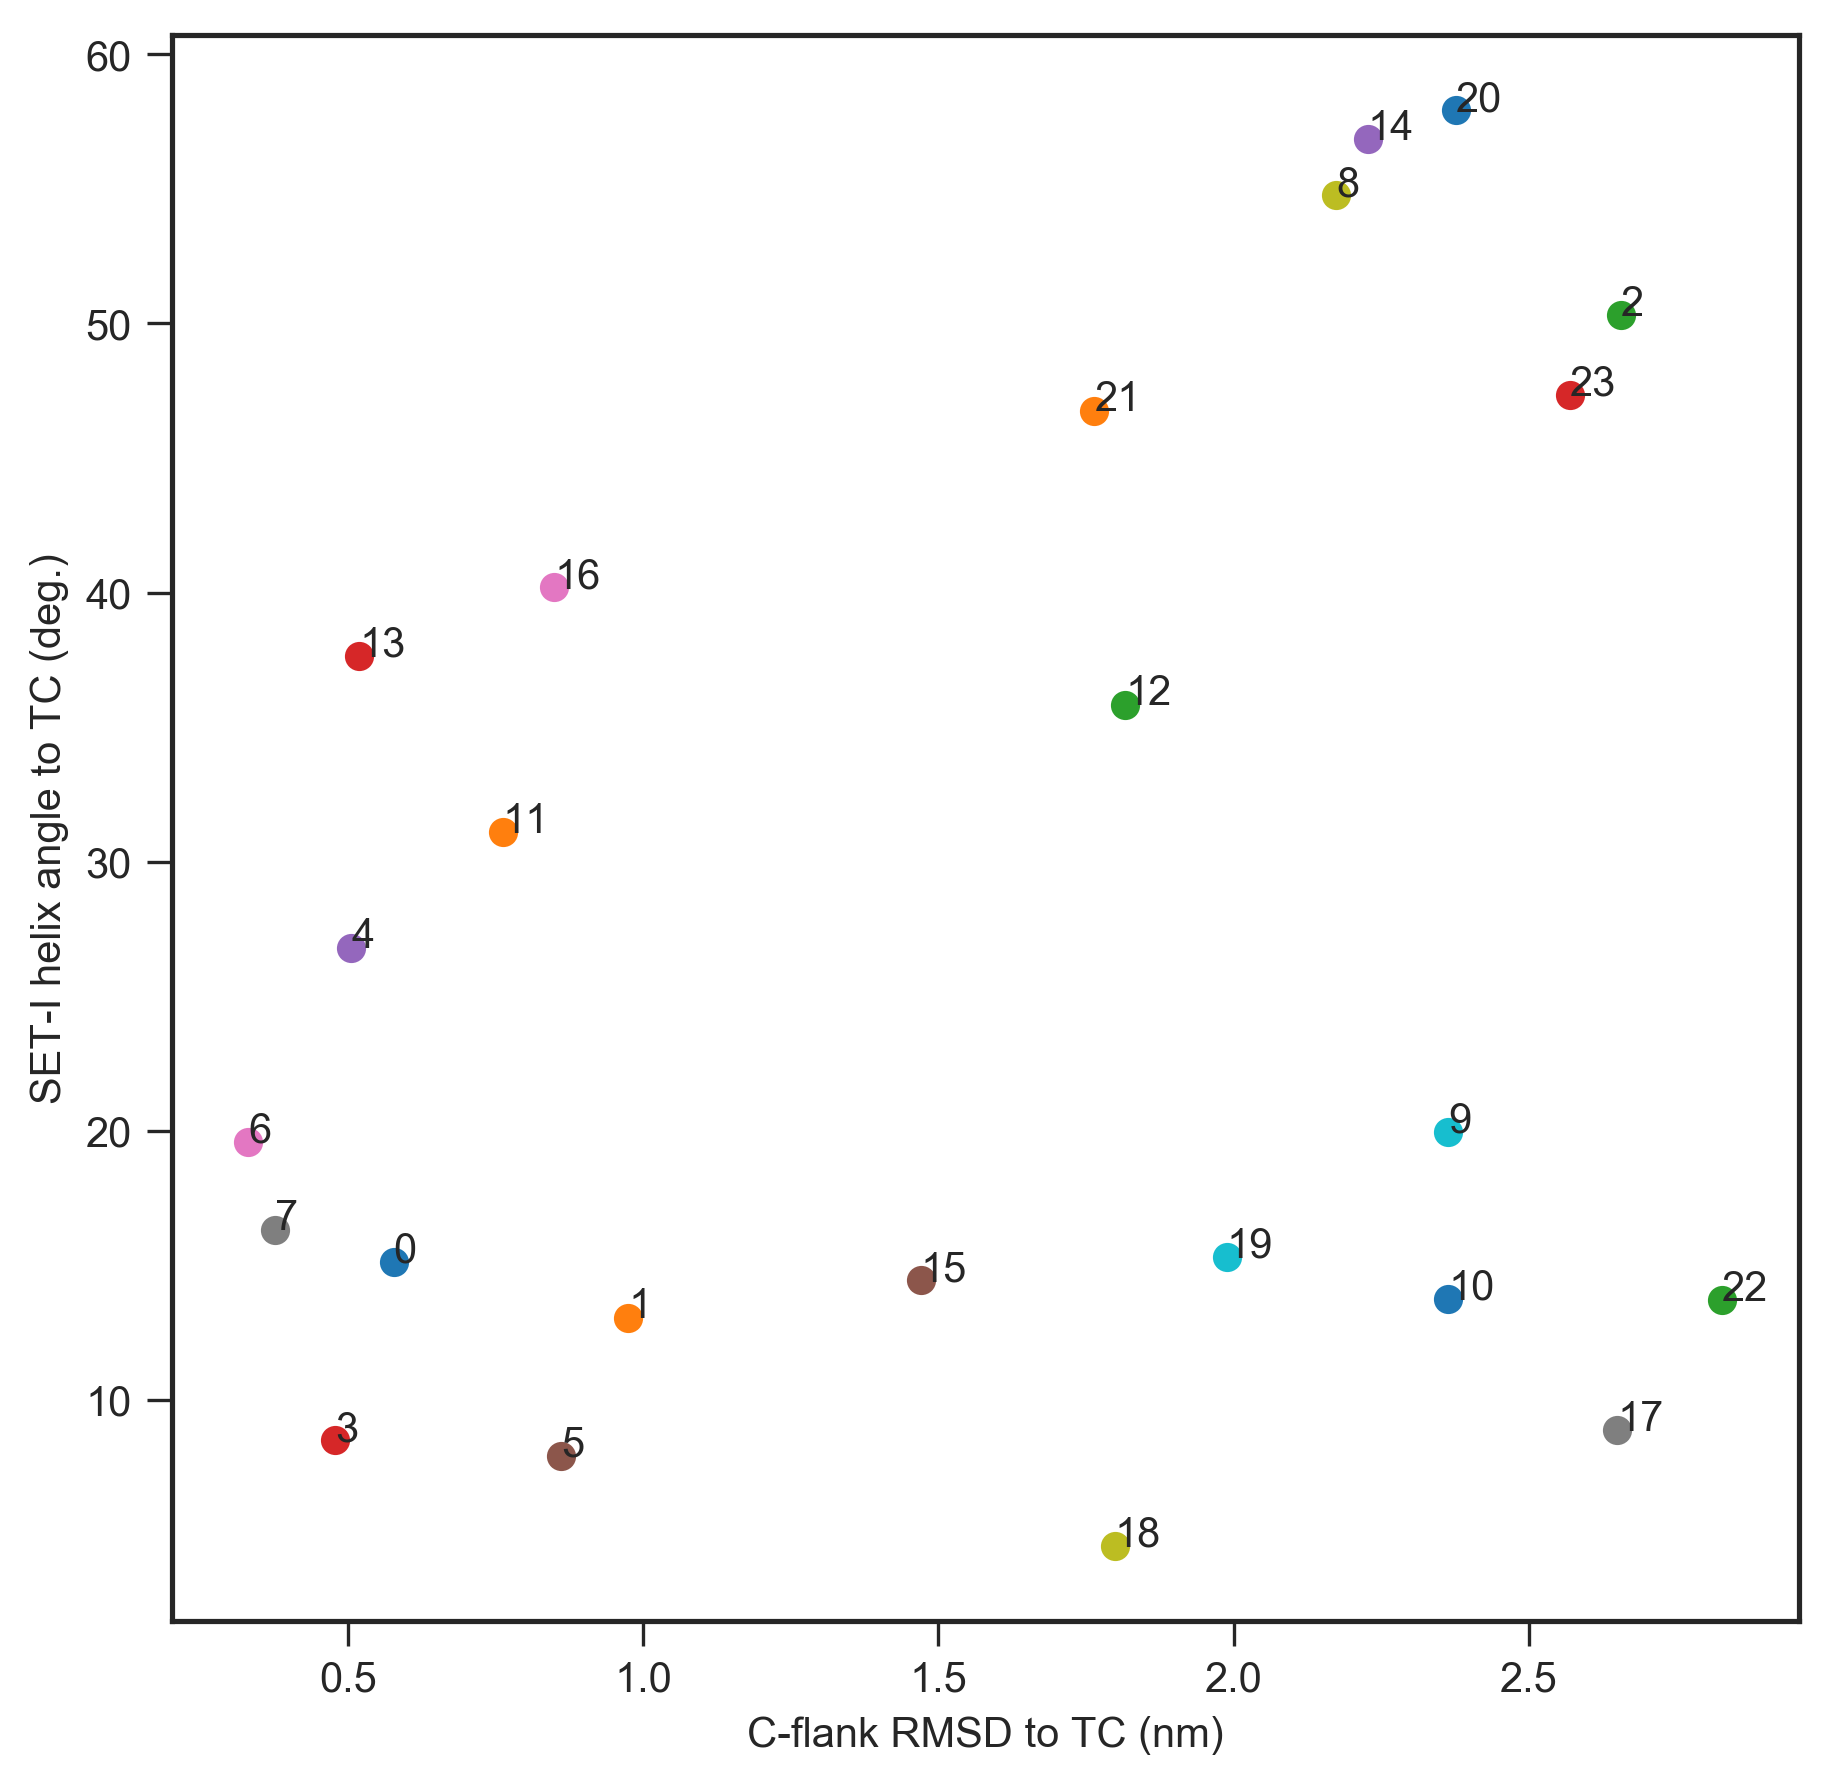

In [21]:
fig, ax = plt.subplots(figsize=(7,7), dpi=300)
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    ax.scatter(cflank_rmsds[j][0][0], seti_angles[i])
    ax.annotate('%d' % i, (cflank_rmsds[j][0][0], seti_angles[i]))
plt.xlabel('C-flank RMSD to TC (nm)')
plt.ylabel('SET-I helix angle to TC (deg.)')
plt.show()    

In [64]:
##############
# let's do all 100 microstates now, colored by macrostate - 3D RMSD figure, then let's automate the helix angle
# calculation in PyMol; next thing - look at more samples from whole dataset

In [84]:
len(whole_rmsds)

100

In [85]:
# try axes orientations 1 and 6

In [28]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [29]:
cmap = get_cmap(24)

In [30]:
# make microstate --> macrostate dictionary

In [31]:
micro_macro_dict = dict()

for index, macrostate in enumerate(meta_sets):
    for microstate in macrostate:
        micro_macro_dict[microstate] = index

In [32]:
np.array(whole_rmsds).shape

(100, 3, 10)

In [33]:
c = []
for i in range(100):
    c.append(micro_macro_dict[i])

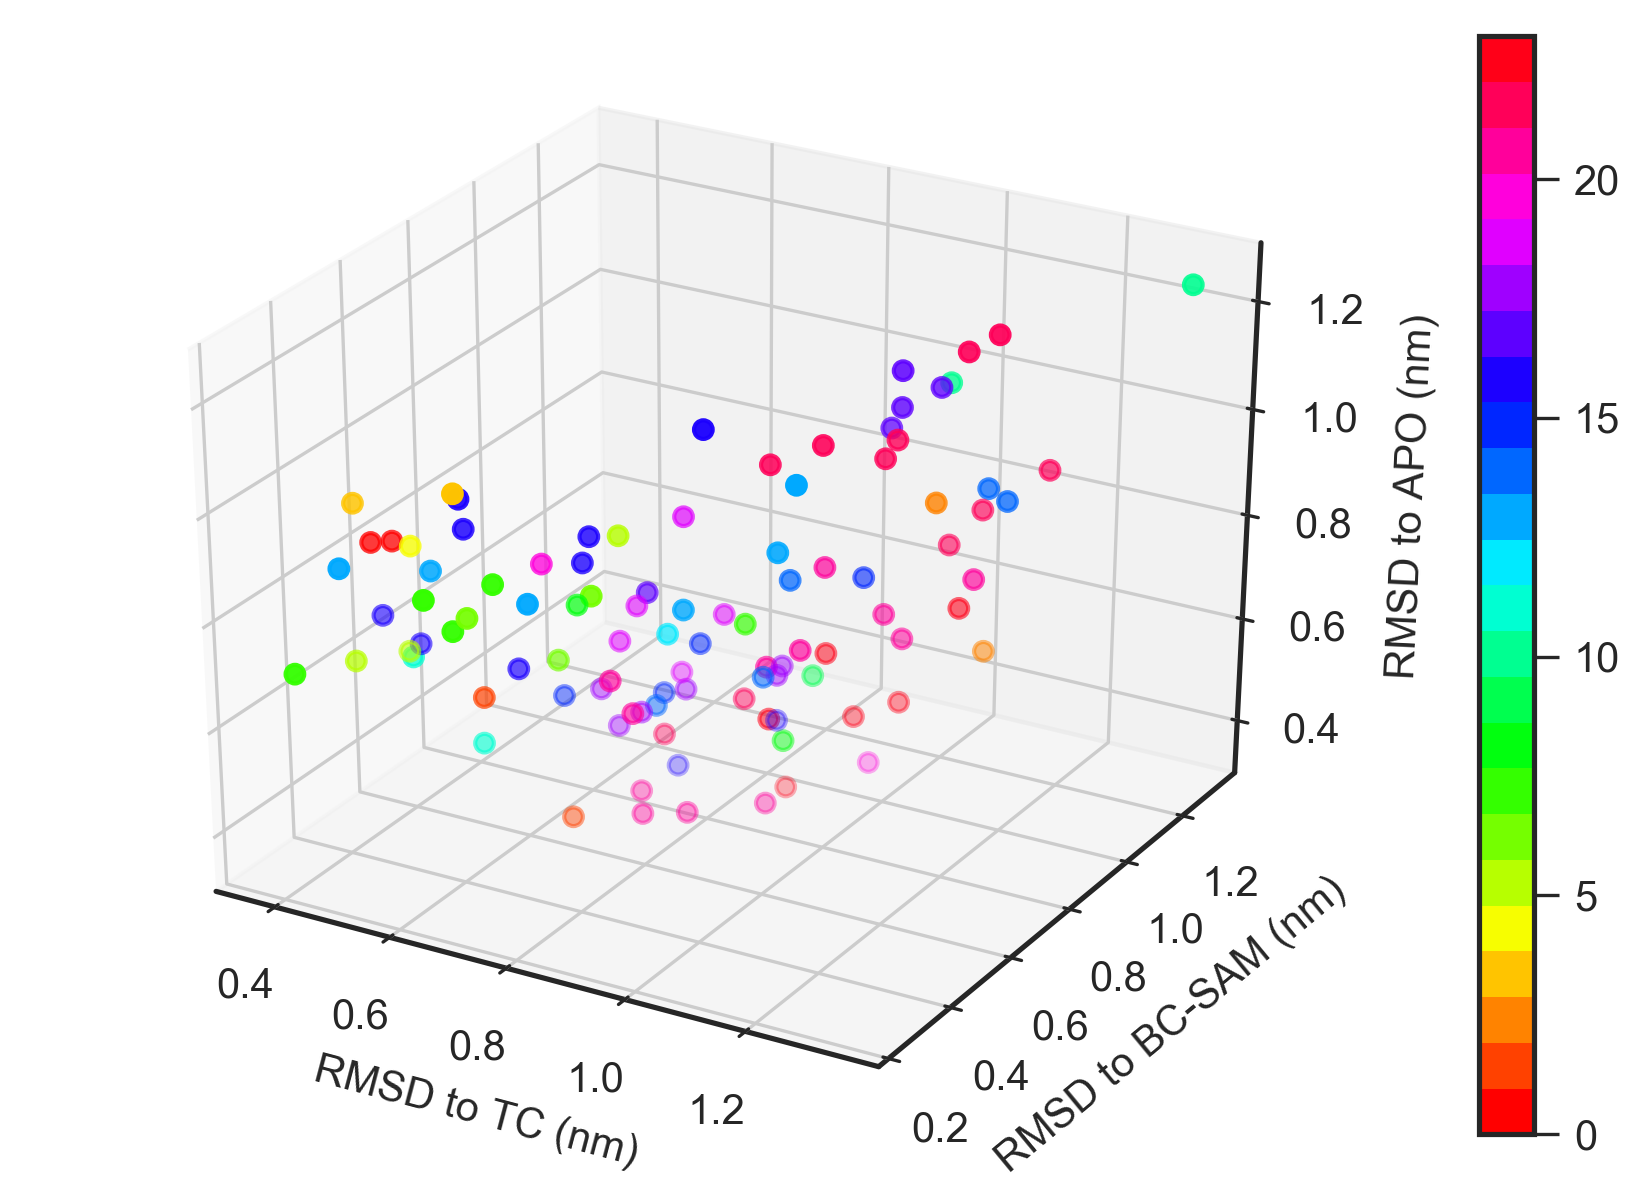

In [35]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(np.array(whole_rmsds)[:,0,0], np.array(whole_rmsds)[:,1,0], np.array(whole_rmsds)[:,2,0], c=c, cmap=cmap)
ax.set_xlabel('RMSD to TC (nm)')
ax.set_ylabel('RMSD to BC-SAM (nm)')
ax.set_zlabel('RMSD to APO (nm)')
plt.tight_layout()
plt.colorbar(sc)
plt.savefig('rmsd_all_microstates/all_1.png', dpi=300)
plt.show()

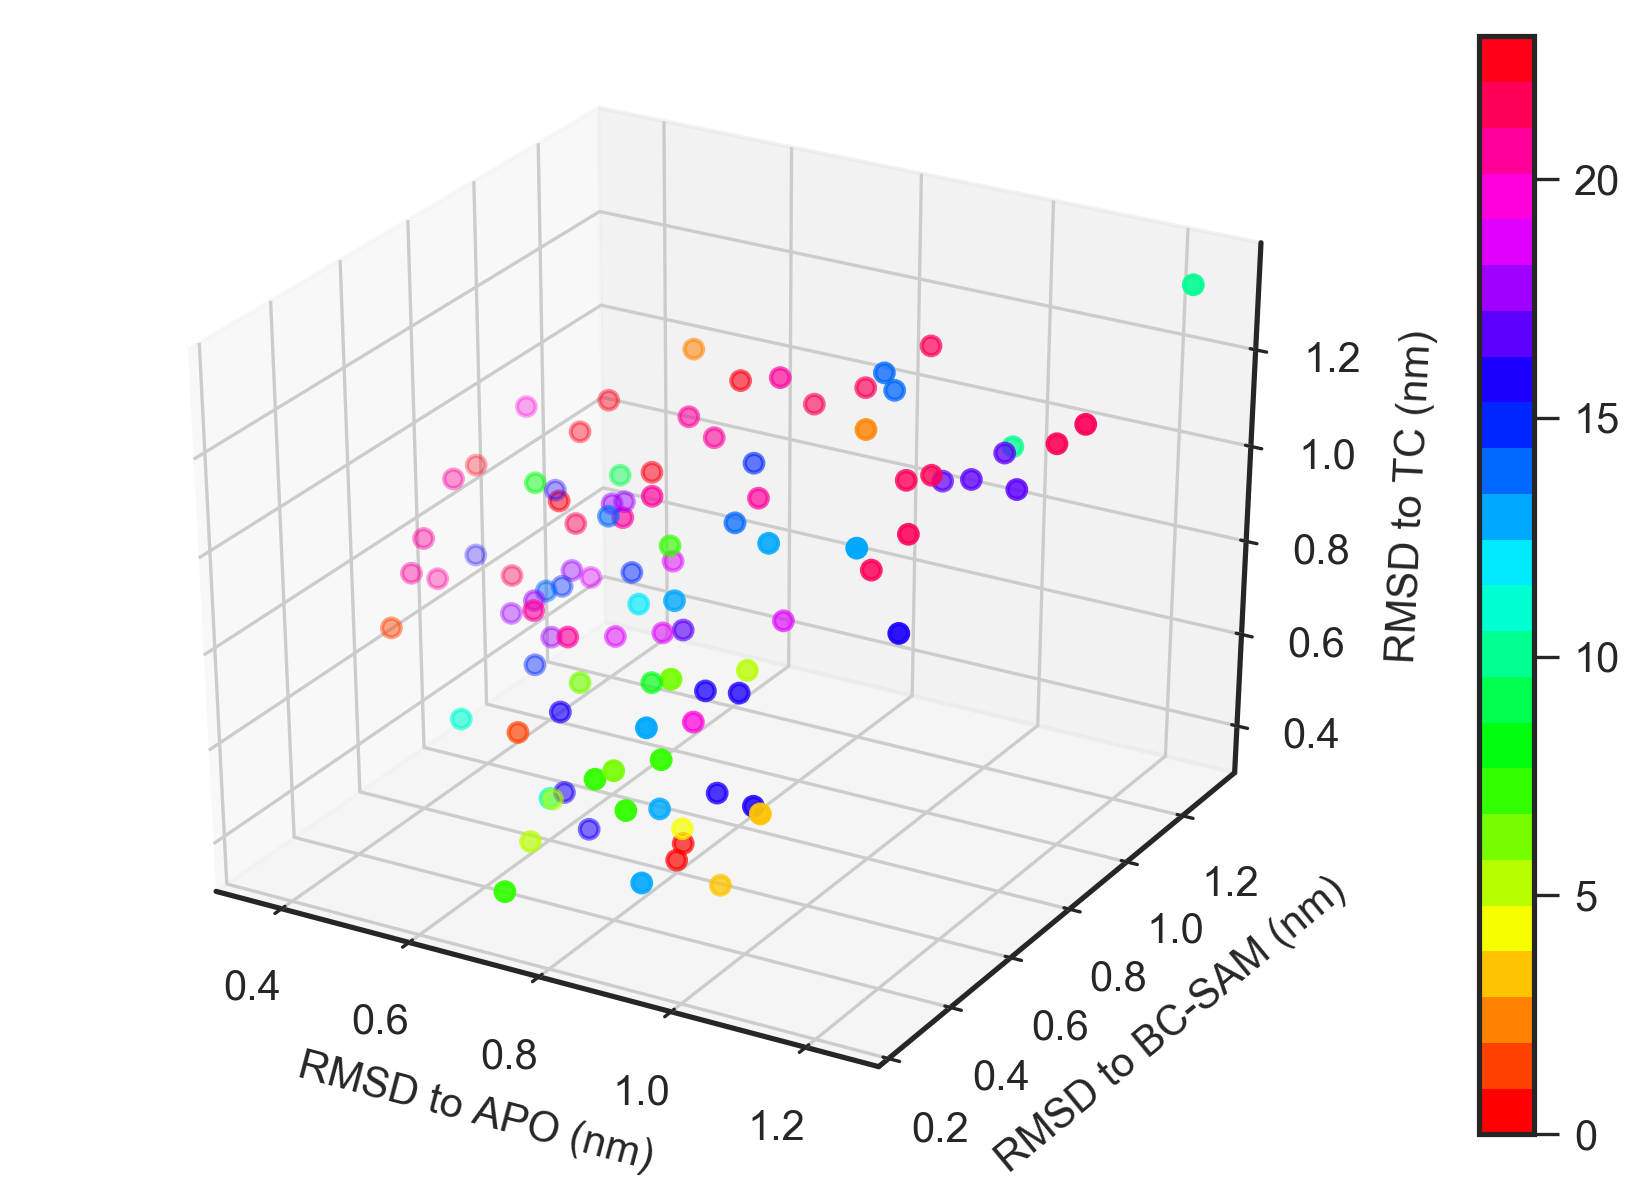

In [36]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(np.array(whole_rmsds)[:,2,0], np.array(whole_rmsds)[:,1,0], np.array(whole_rmsds)[:,0,0], c=c, cmap=cmap)
ax.set_xlabel('RMSD to APO (nm)')
ax.set_ylabel('RMSD to BC-SAM (nm)')
ax.set_zlabel('RMSD to TC (nm)')
plt.tight_layout()
plt.colorbar(sc)
plt.savefig('rmsd_all_microstates/all_2.png', dpi=300)
plt.show()

In [83]:
# let's make a plot for every macrostate

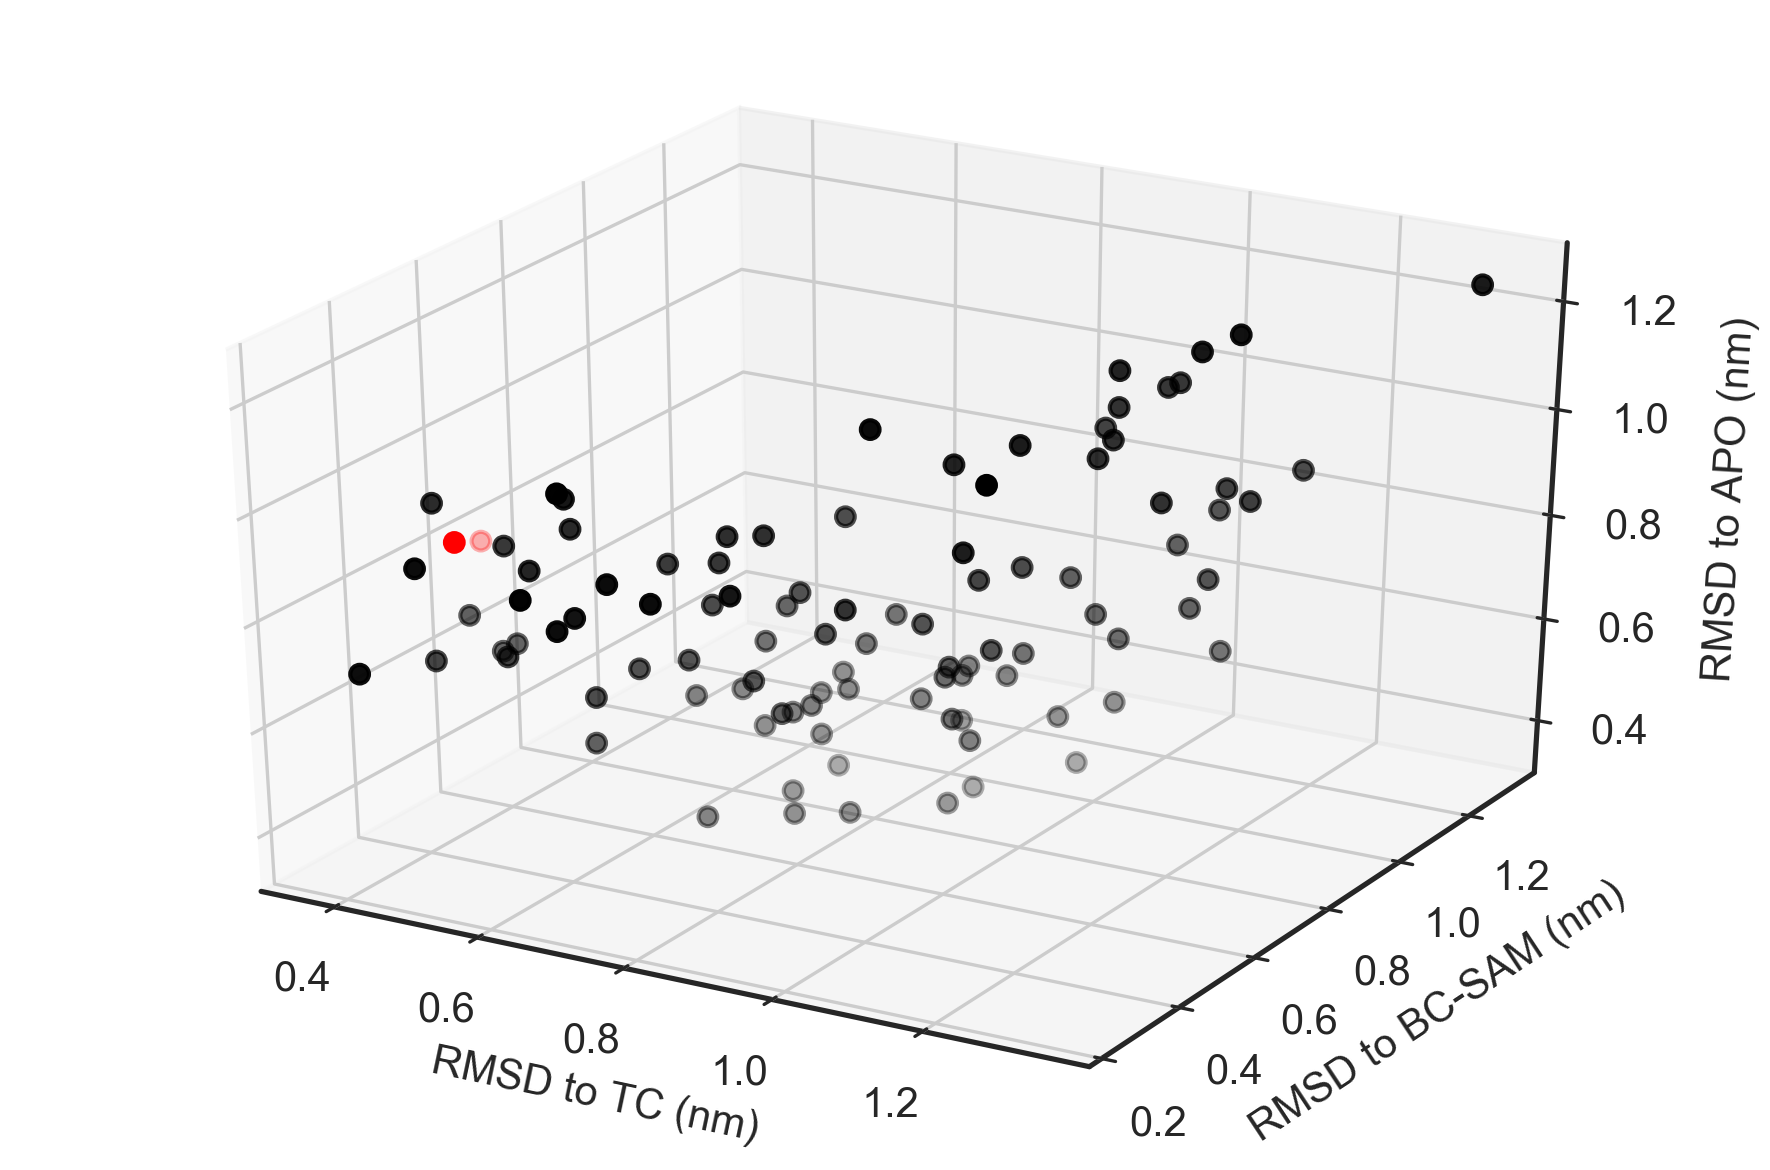

In [132]:
macrostate = 0

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(whole_rmsds)[meta_sets[macrostate],0,0], np.array(whole_rmsds)[meta_sets[macrostate],1,0], np.array(whole_rmsds)[meta_sets[macrostate],2,0], c='red')
ax.scatter(np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),1,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),2,0], c='black')
ax.set_xlabel('RMSD to TC (nm)')
ax.set_ylabel('RMSD to BC-SAM (nm)')
ax.set_zlabel('RMSD to APO (nm)')
plt.tight_layout()
plt.show()

In [20]:
for macrostate in range(24):
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(np.array(whole_rmsds)[meta_sets[macrostate],0,0], np.array(whole_rmsds)[meta_sets[macrostate],1,0], np.array(whole_rmsds)[meta_sets[macrostate],2,0], c='red')
    ax.scatter(np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),1,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),2,0], c='black')
    ax.set_xlabel('RMSD to TC (nm)')
    ax.set_ylabel('RMSD to BC-SAM (nm)')
    ax.set_zlabel('RMSD to APO (nm)')
    plt.tight_layout()
    plt.savefig('rmsd_all_microstates/orient_1/%d.png' % macrostate, dpi=300)
    plt.close()

In [34]:
for macrostate in range(24):
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(np.array(whole_rmsds)[meta_sets[macrostate],2,0], np.array(whole_rmsds)[meta_sets[macrostate],1,0], np.array(whole_rmsds)[meta_sets[macrostate],0,0], c='red')
    ax.scatter(np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),2,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),1,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], c='black')
    ax.set_xlabel('RMSD to APO (nm)')
    ax.set_ylabel('RMSD to BC-SAM (nm)')
    ax.set_zlabel('RMSD to TC (nm)')
    plt.tight_layout()
    plt.savefig('rmsd_all_microstates/orient_2/%d.png' % macrostate, dpi=300)
    plt.close()

In [133]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [92]:
meta_sets[0]

array([48, 76])

In [86]:
macrostate = 0

In [89]:
np.array(whole_rmsds)[np.array([x for x in range(24) if x != 0]),0,0]

array([ 0.48848686,  0.90991032,  1.0263468 ,  1.05752134,  0.61554331,
        0.99143851,  0.95653743,  0.52192253,  0.66508877,  1.01049757,
        0.45436728,  0.73572731,  0.82084   ,  0.7069177 ,  0.73904938,
        1.14408457,  0.40529677,  1.09719336,  0.81078088,  0.61585975,
        0.92930233,  0.80777591,  0.41354287], dtype=float32)

In [88]:
np.array([x for in range(24) if x != 0])

SyntaxError: invalid syntax (<ipython-input-88-b083830a9377>, line 1)

In [96]:
np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0]

array([ 0.76908958,  0.48848686,  0.90991032,  1.0263468 ,  1.05752134,
        0.61554331,  0.99143851,  0.95653743,  0.52192253,  0.66508877,
        1.01049757,  0.45436728,  0.73572731,  0.82084   ,  0.7069177 ,
        0.73904938,  1.14408457,  0.40529677,  1.09719336,  0.81078088,
        0.61585975,  0.92930233,  0.80777591,  0.41354287,  1.00998223,
        0.9118188 ,  1.13391435,  1.15869784,  1.0076257 ,  0.44313636,
        0.76139104,  0.6899786 ,  0.87624174,  1.17448056,  0.91744065,
        0.36772692,  0.67838877,  0.7254495 ,  0.88191819,  0.89119744,
        0.54446948,  0.82407731,  1.14064455,  0.58299625,  0.66806042,
        0.71278274,  1.04483342,  0.69105589,  0.67307305,  1.09712732,
        1.12352788,  0.95933777,  1.12321246,  1.08456933,  0.95130569,
        0.98994762,  0.78229135,  0.9327119 ,  0.78773767,  0.8965885 ,
        1.01562536,  0.74313444,  0.52116567,  0.9906342 ,  0.73410958,
        0.41422895,  0.44477898,  0.95934987,  1.34601831,  0.58

In [16]:
# ok now I want to do the 2D figure using the 'SET-I angle' for 100 microstates - gotta calculate
# the SET-I angles for all microstates

In [ ]:
# got the angles - wrt. Inh2_a (new name Inh2) - because furthest out SETI from all TC, but try 4IJ8 and Apo too
# PYMOL script:
#angles = []
#select hel_inh_a, inh_a and resi 65-70
#for i in range(100): cmd.select('hel_%s' % i, '%d and resi 65-70' % i)
#for i in range(100): angles.append(cmd.angle_between_helices('hel_inh_a', 'hel_%d' % i, method='loop_orientation’))
#print(angles)

In [5]:
angles_tc = [15.289760106180715, 38.91862460481046, 55.7250843337649, 61.505458678440135, 17.337011000481603, 24.830749881660523, 31.158202660177402, 47.08913772345911, 15.240293002745096, 18.228267485414232, 21.66292358199859, 23.875603826103063, 20.132823048164607, 60.624740738725706, 5.421417459468584, 24.875414259463245, 39.50345862786997, 22.91525229082659, 53.762114431570694, 12.496316649060175, 15.319955970067188, 62.754759631724404, 5.784693912278059, 23.691124383107667, 17.65087783328273, 29.790984058768842, 29.3561204206257, 61.48192478346624, 59.897489728449294, 7.125564274057078, 36.4667711854727, 11.925406875883517, 54.61631080854389, 54.428584417259124, 49.51545070509107, 3.931909954093058, 24.414374383849026, 61.68847134029399, 38.516701621091116, 22.40229613695571, 15.14284448754509, 48.635266506372304, 67.76450954133041, 26.74814890816031, 25.89938143747235, 17.999758378386105, 64.93391313948895, 53.98525839314068, 24.441148184148375, 38.52421109282581, 20.527703514500953, 20.944059804623578, 63.04617624807833, 92.54087622170029, 22.770186958075247, 26.529845681518484, 15.74708253046772, 40.49619993965829, 30.395289520391096, 16.751032047511636, 46.79086040140485, 40.18949606235862, 27.79787552448985, 22.99259394011079, 61.54831034116253, 50.83467838324648, 25.93088619084045, 31.27568140156895, 32.7920665362992, 34.456206803197375, 23.39134684201, 16.113710713268777, 33.68124826740015, 33.66504198902045, 33.1001431945857, 39.33611573675866, 22.913729136397915, 13.036890330264704, 11.088426035426076, 25.155582939413623, 26.113641793821227, 46.59289870713106, 43.98095085474964, 28.005326692053504, 23.95314154054326, 27.548180395258534, 8.593786902767613, 28.082512397733243, 64.0656329156435, 22.910815225113463, 19.610028103269105, 15.427247577450713, 2.545230472785511, 61.33787193832795, 14.67515595115645, 60.28947732446447, 26.79867636979347, 21.601615029533985, 79.12096061790251, 11.976065357556628]

In [6]:
len(angles_tc)

100

In [7]:
# get apo and 4ij8, then make figures

In [8]:
angles_apo = [52.15827411228818, 34.894424999107216, 8.229526513200247, 9.274055713189703, 49.9170107005927, 32.92915974064204, 42.629623446322356, 11.729597749401844, 47.898396068538226, 52.97010349104677, 55.65392552166796, 43.0373533152075, 45.89124063603741, 15.293860594634857, 59.9195162624879, 48.461615790705196, 22.165582549179238, 34.86623016828232, 24.82785347941082, 55.28589379555912, 52.907082718220146, 8.096400464384502, 54.84415216523411, 48.99810605368293, 54.67824204071741, 28.15347029344503, 42.335379963261175, 34.14383600760395, 14.162206982710345, 58.87920416716906, 50.27911997735023, 48.24104765367304, 17.46664153727222, 17.609838329421986, 11.213308264603944, 56.567426530648326, 46.99489611190331, 11.18462805097744, 47.4456021329247, 52.91810200014623, 43.44368021629824, 12.700013931960251, 18.932064681191285, 53.7073833028835, 32.142127353936395, 55.09577811348166, 9.966913970722276, 11.303518688690872, 40.69107344393479, 37.34323308822998, 51.86942504024017, 56.18945335608267, 6.383422111377435, 37.27923232948058, 43.72465075014291, 45.83894454523358, 50.282586671929344, 17.006136137717505, 31.525202974278365, 41.94334894657437, 14.751258438036716, 43.96053841449534, 36.007402006690846, 44.701322862035525, 4.2029319406156045, 8.315995931623899, 32.666221386904375, 42.704062285478415, 28.1850105068409, 46.12444313236322, 35.12897767473824, 52.20570857053096, 52.01547286747328, 24.10612651029901, 24.64215176875704, 18.71548981329182, 44.53182958269576, 52.677375247556455, 55.990261909397624, 46.741096816012664, 51.560151291029484, 23.53302516766133, 14.245823037015107, 37.37940153337895, 56.10645267382552, 39.19348321394743, 56.403299491461055, 50.49193662485819, 20.749860898457317, 50.44131499083669, 50.004845651842345, 52.44130267111315, 55.3264665585649, 15.267600594359442, 54.88101931499093, 6.524584080289547, 33.21477841063786, 53.3751584059952, 29.21397712849254, 53.945397659477244]

In [9]:
len(angles_apo)

100

In [35]:
angles_ij8 = [35.88222590450044, 25.020848313543908, 16.56224967535928, 22.101435298107, 33.87099891204856, 16.124057231499986, 29.7515179081027, 8.603774697979256, 31.399873546866676, 37.14976341506054, 40.40520272410746, 27.920164780460016, 30.121889876884026, 23.746445665911047, 42.86805137744363, 33.914360854351756, 10.641055591594526, 17.81613451766812, 24.748433547341275, 38.726266828186844, 36.652610808565086, 22.816447187397255, 37.80751317553503, 34.181533834873235, 38.77260605647422, 11.704863893314469, 28.834297023064035, 36.007725383597446, 22.65741451430152, 41.90690745632524, 38.96543735595293, 31.342973984055583, 20.23868164799219, 20.177823593619802, 11.000705701430427, 39.49553789835466, 32.28961248701503, 22.8689569635175, 37.003195028348436, 37.85376769583307, 26.457942300034475, 10.96268789097529, 30.433863864926177, 39.56359625739179, 15.211349884878048, 39.24099029360242, 25.03674932335773, 16.123145191348385, 25.45610048231424, 27.301442714627477, 36.44033344547828, 40.79909796797882, 22.712418797276428, 53.20690074622413, 28.381053313201175, 31.64507748411825, 34.00398219591873, 1.067931111720621, 17.59603412900247, 24.99930118007654, 10.366049176734576, 34.36388566805926, 22.02481230994136, 29.502092014559626, 21.126164750996693, 11.592010548356908, 16.442872770798203, 29.868772856498907, 13.48984550578099, 34.363340859074846, 18.706509900959034, 36.04718221935068, 39.750767887788925, 7.216273447993091, 7.705568540984878, 3.457364883021713, 29.298640753925532, 36.13335686185208, 39.29946647187992, 32.21405637720075, 37.31861080273998, 18.587798170016374, 4.8172277964663595, 23.78084273015073, 41.280610452728276, 25.701837199424773, 39.524372545305766, 36.75330309305551, 28.93738731253788, 35.47596776462061, 34.36348945885855, 36.19134926604864, 38.28717083701474, 24.270942958613904, 38.56594758379259, 20.35818979518412, 17.11215707526335, 38.15149248277936, 42.19993316925259, 37.3172503882391]

In [36]:
len(angles_ij8)

100

In [ ]:
for macrostate in range(24):
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(np.array(whole_rmsds)[meta_sets[macrostate],0,0], np.array(whole_rmsds)[meta_sets[macrostate],1,0], np.array(whole_rmsds)[meta_sets[macrostate],2,0], c='red')
    ax.scatter(np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),1,0], np.array(whole_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),2,0], c='black')
    ax.set_xlabel('RMSD to TC (nm)')
    ax.set_ylabel('RMSD to BC-SAM (nm)')
    ax.set_zlabel('RMSD to APO (nm)')
    plt.tight_layout()
    plt.savefig('rmsd_all_microstates/orient_1/%d.png' % macrostate, dpi=300)
    plt.close()

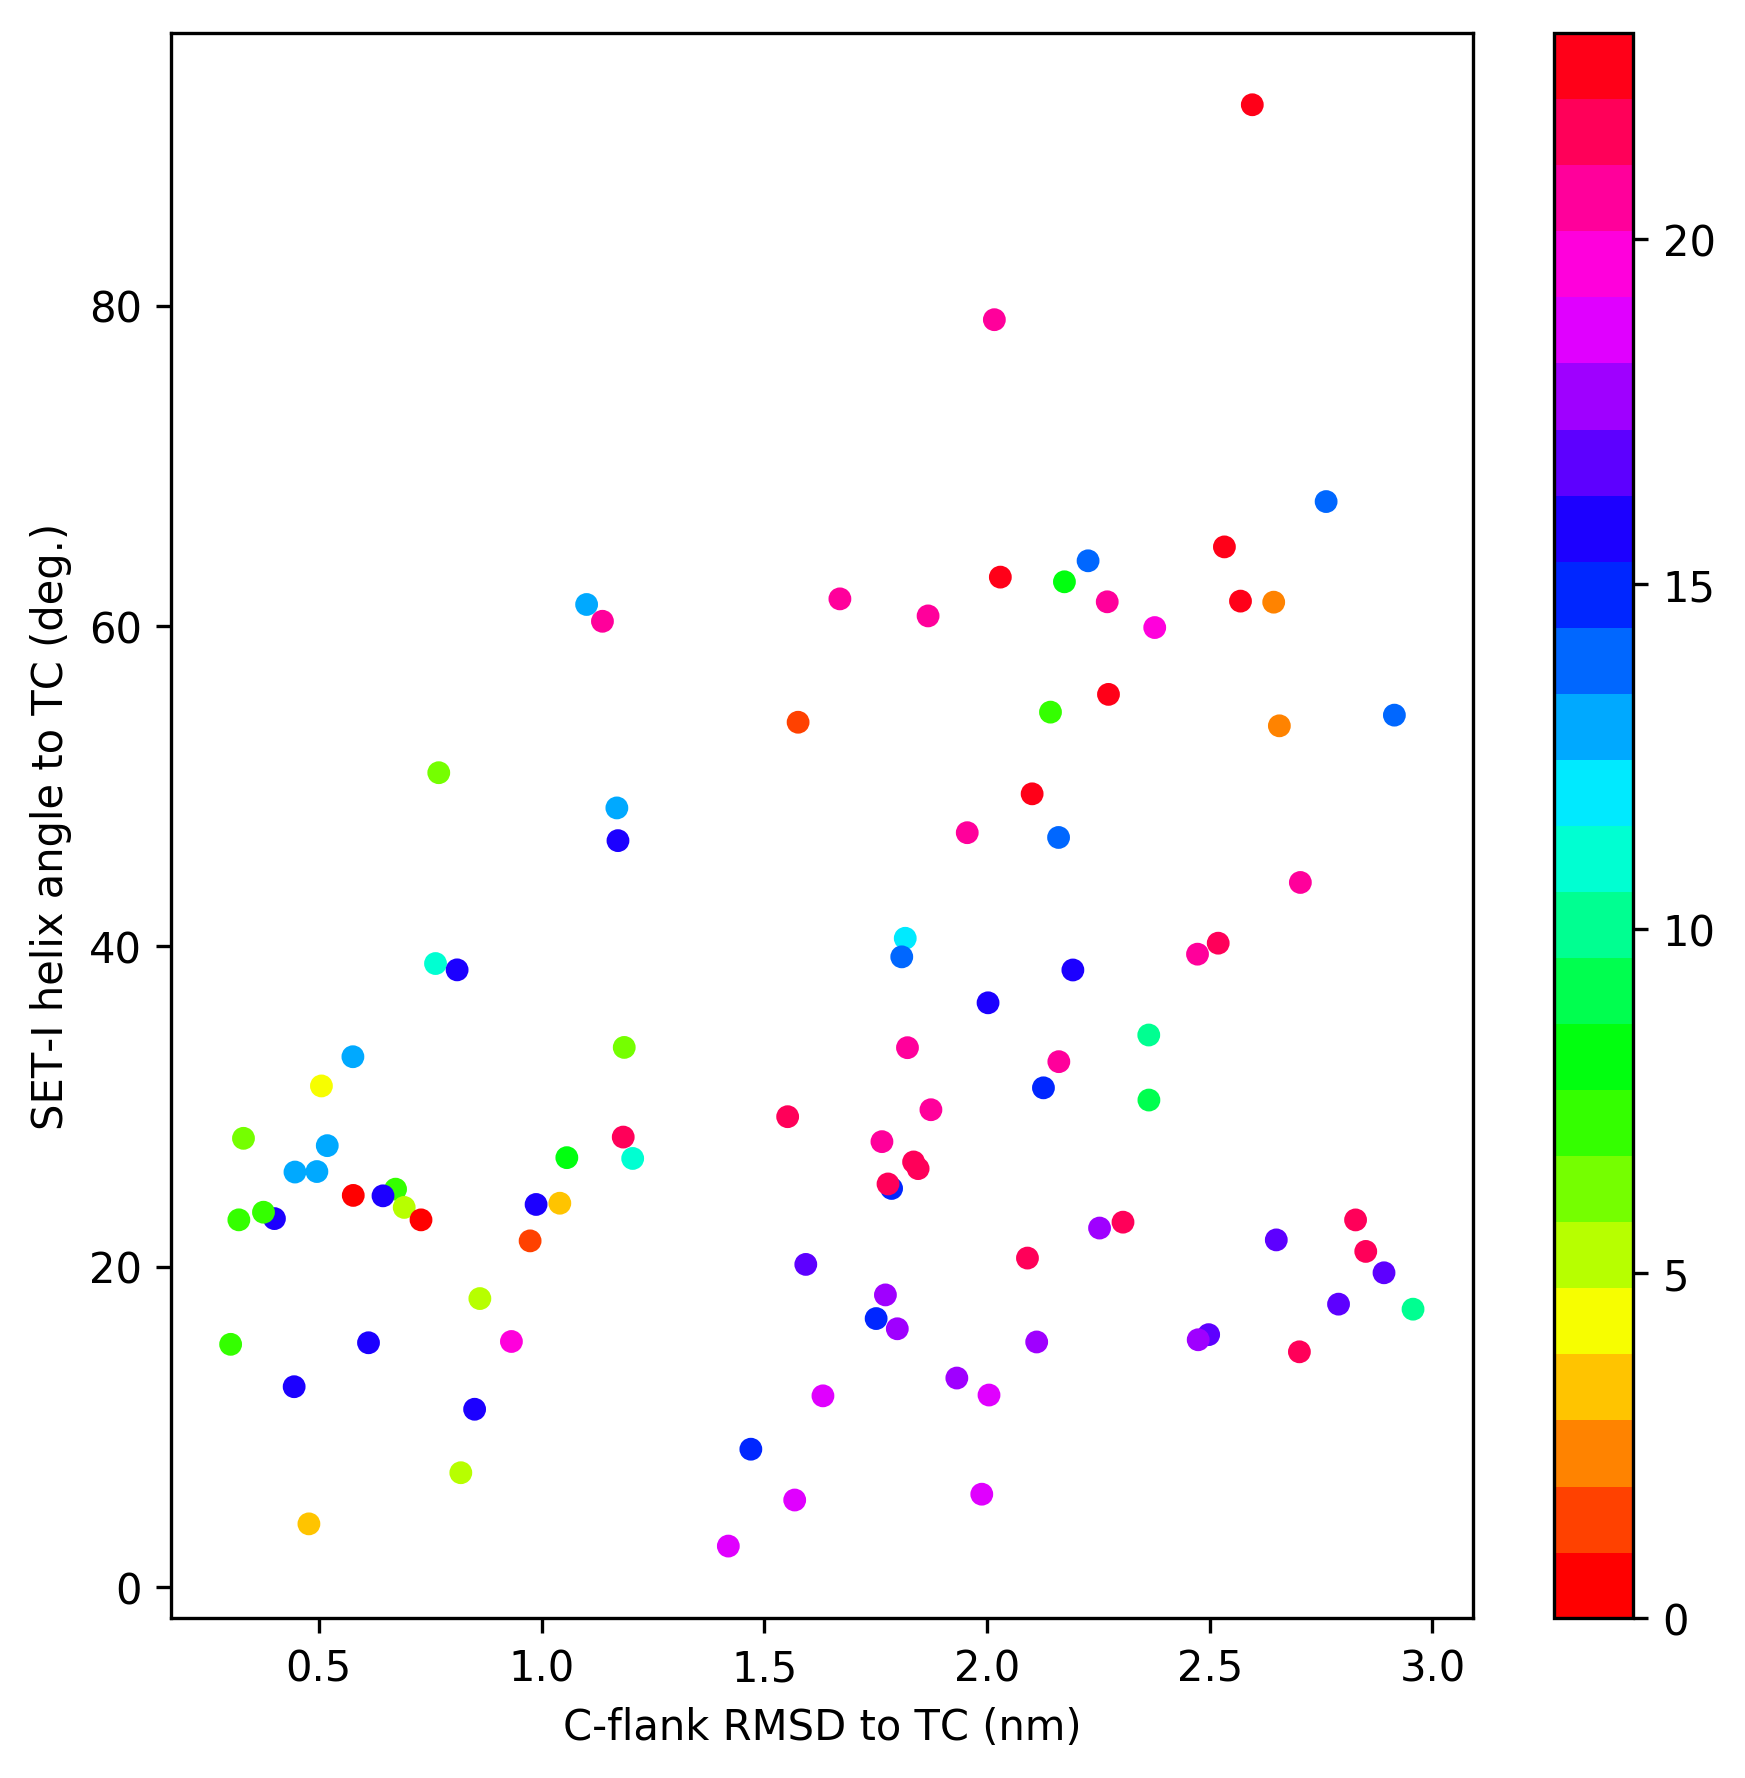

In [54]:
fig, ax = plt.subplots(figsize=(7,7), dpi=300)
sc = ax.scatter(np.array(cflank_rmsds)[:,0,0], angles_tc, c=c, cmap=cmap, s=20)
plt.xlabel('C-flank RMSD to TC (nm)')
plt.ylabel('SET-I helix angle to TC (deg.)')
plt.colorbar(sc)
plt.savefig('rmsd_all_microstates/2d_tc_all.png', dpi=300)
plt.show()

In [48]:
for macrostate in range(24):
    fig, ax = plt.subplots(figsize=(7,7), dpi=300)
    ax.scatter(np.array(cflank_rmsds)[meta_sets[macrostate],0,0], np.array(angles_tc)[meta_sets[macrostate]], c='red', s=20)
    ax.scatter(np.array(cflank_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], np.array(angles_tc)[np.array([x for x in range(100) if x not in meta_sets[macrostate]])], c='black', s=20)
    plt.xlabel('C-flank RMSD to TC (nm)')
    plt.ylabel('SET-I helix angle to TC (deg.)')
    plt.tight_layout()
    plt.savefig('rmsd_all_microstates/2d_tc/%d.png' % macrostate, dpi=300)
    plt.close()

In [47]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [49]:
# now SET-I angles to apo

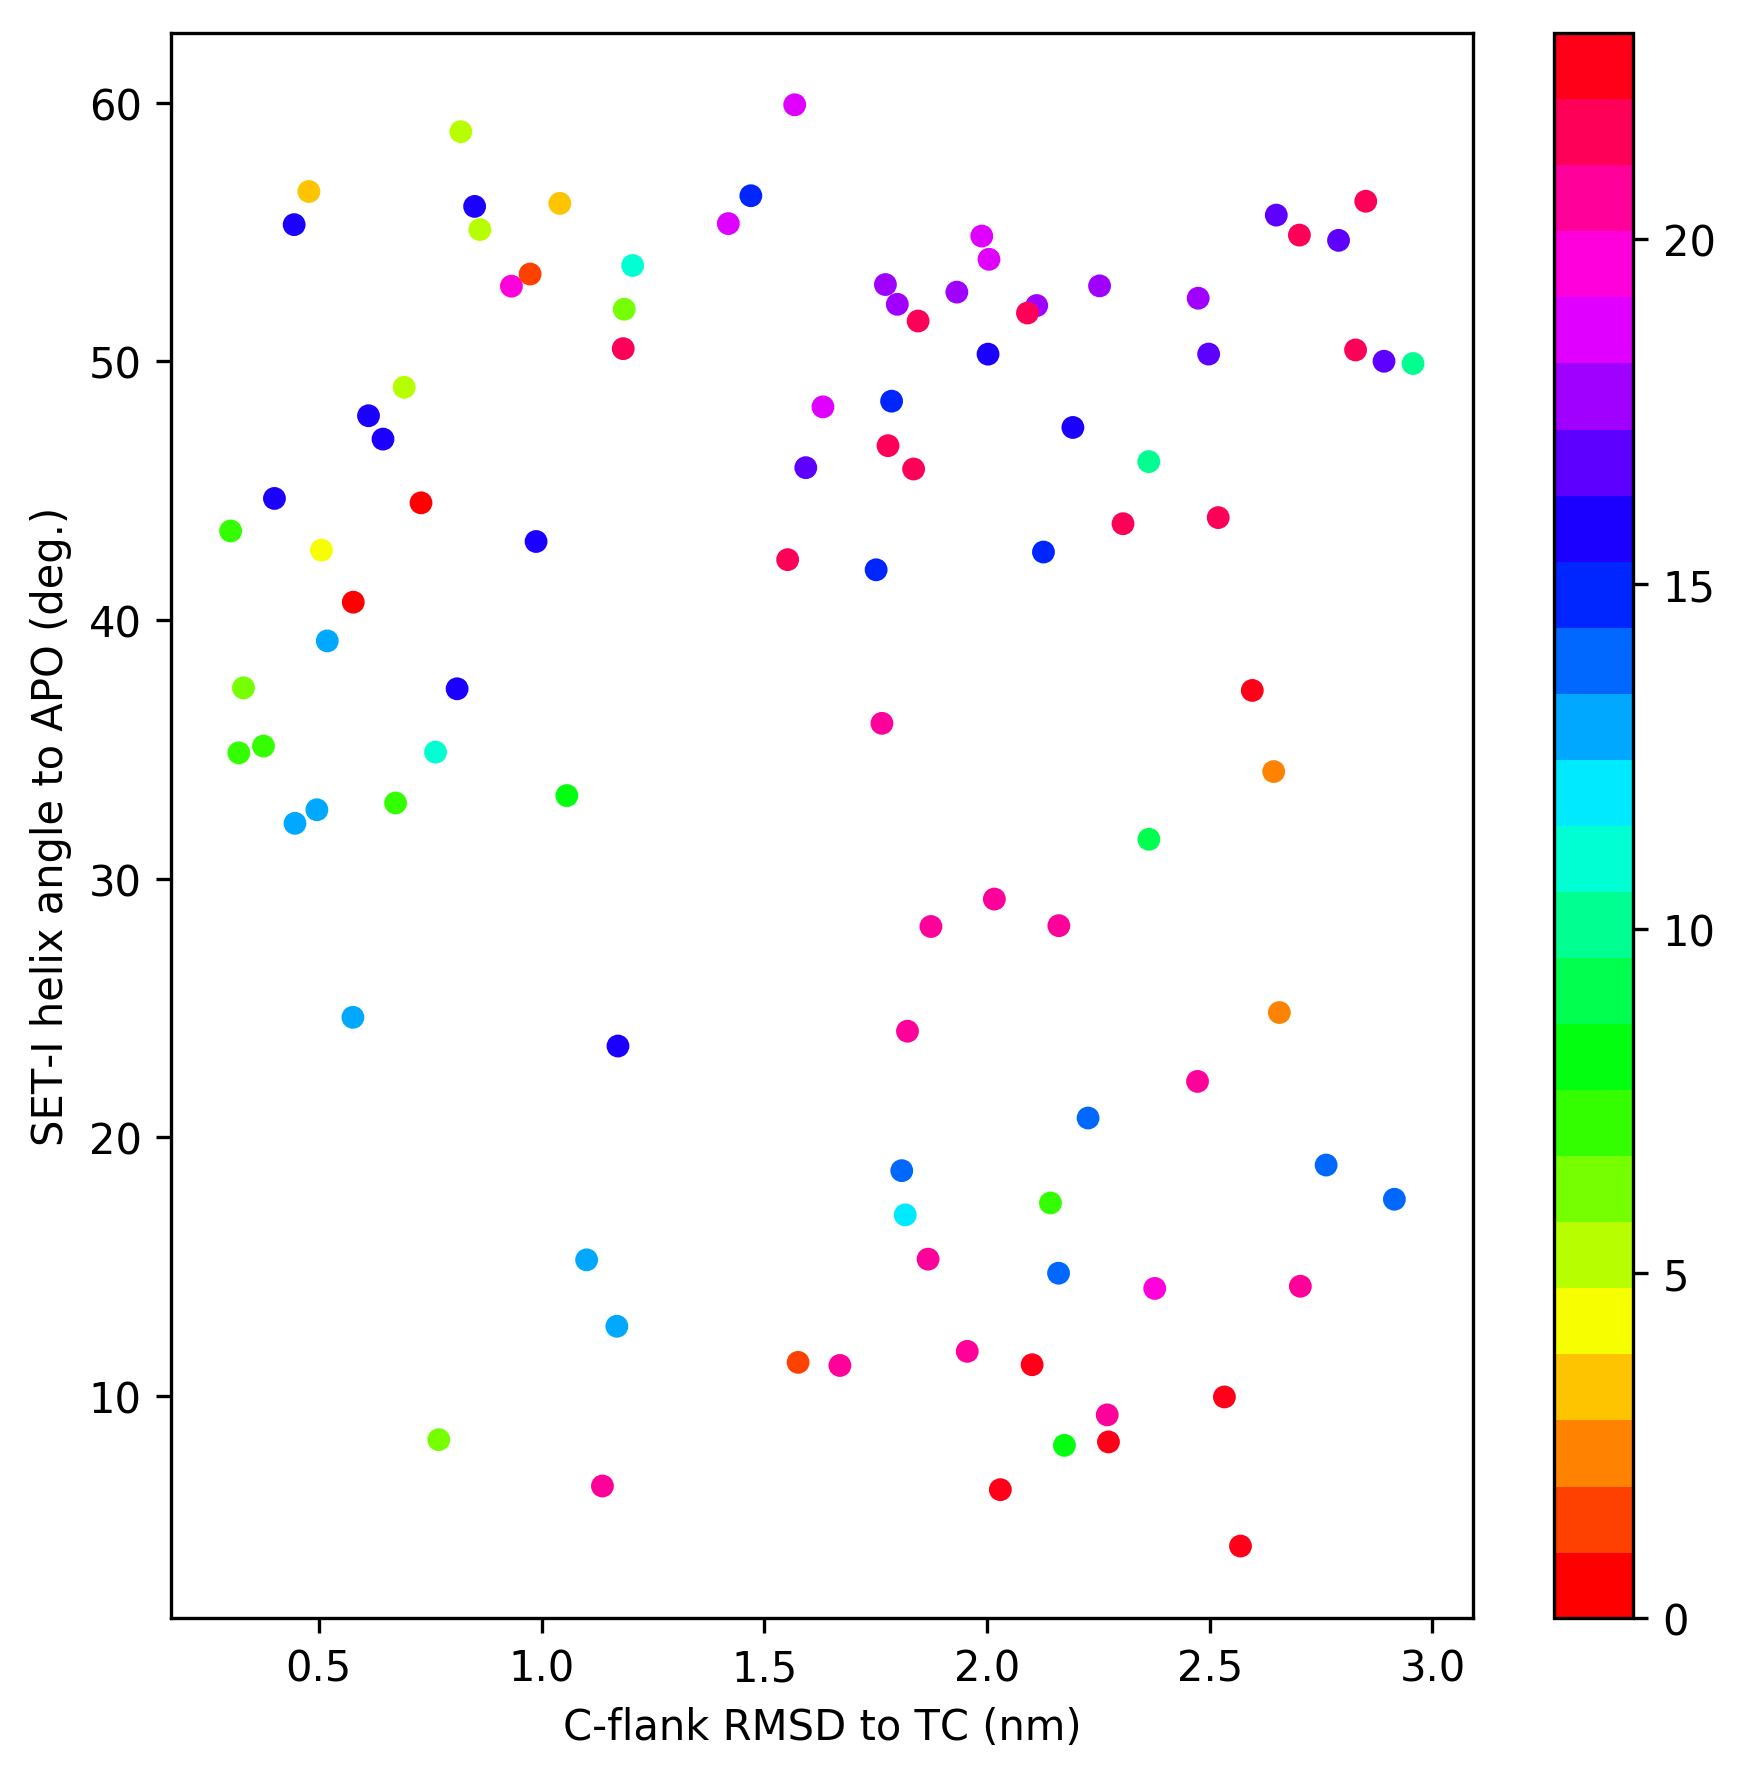

In [55]:
fig, ax = plt.subplots(figsize=(7,7), dpi=300)
sc = ax.scatter(np.array(cflank_rmsds)[:,0,0], angles_apo, c=c, cmap=cmap, s=20)
plt.xlabel('C-flank RMSD to TC (nm)')
plt.ylabel('SET-I helix angle to APO (deg.)')
plt.colorbar(sc)
plt.savefig('rmsd_all_microstates/2d_apo_all.png', dpi=300)
plt.show()    

In [51]:
for macrostate in range(24):
    fig, ax = plt.subplots(figsize=(7,7), dpi=300)
    ax.scatter(np.array(cflank_rmsds)[meta_sets[macrostate],0,0], np.array(angles_apo)[meta_sets[macrostate]], c='red', s=20)
    ax.scatter(np.array(cflank_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], np.array(angles_apo)[np.array([x for x in range(100) if x not in meta_sets[macrostate]])], c='black', s=20)
    plt.xlabel('C-flank RMSD to TC (nm)')
    plt.ylabel('SET-I helix angle to APO (deg.)')
    plt.tight_layout()
    plt.savefig('rmsd_all_microstates/2d_apo/%d.png' % macrostate, dpi=300)
    plt.close()

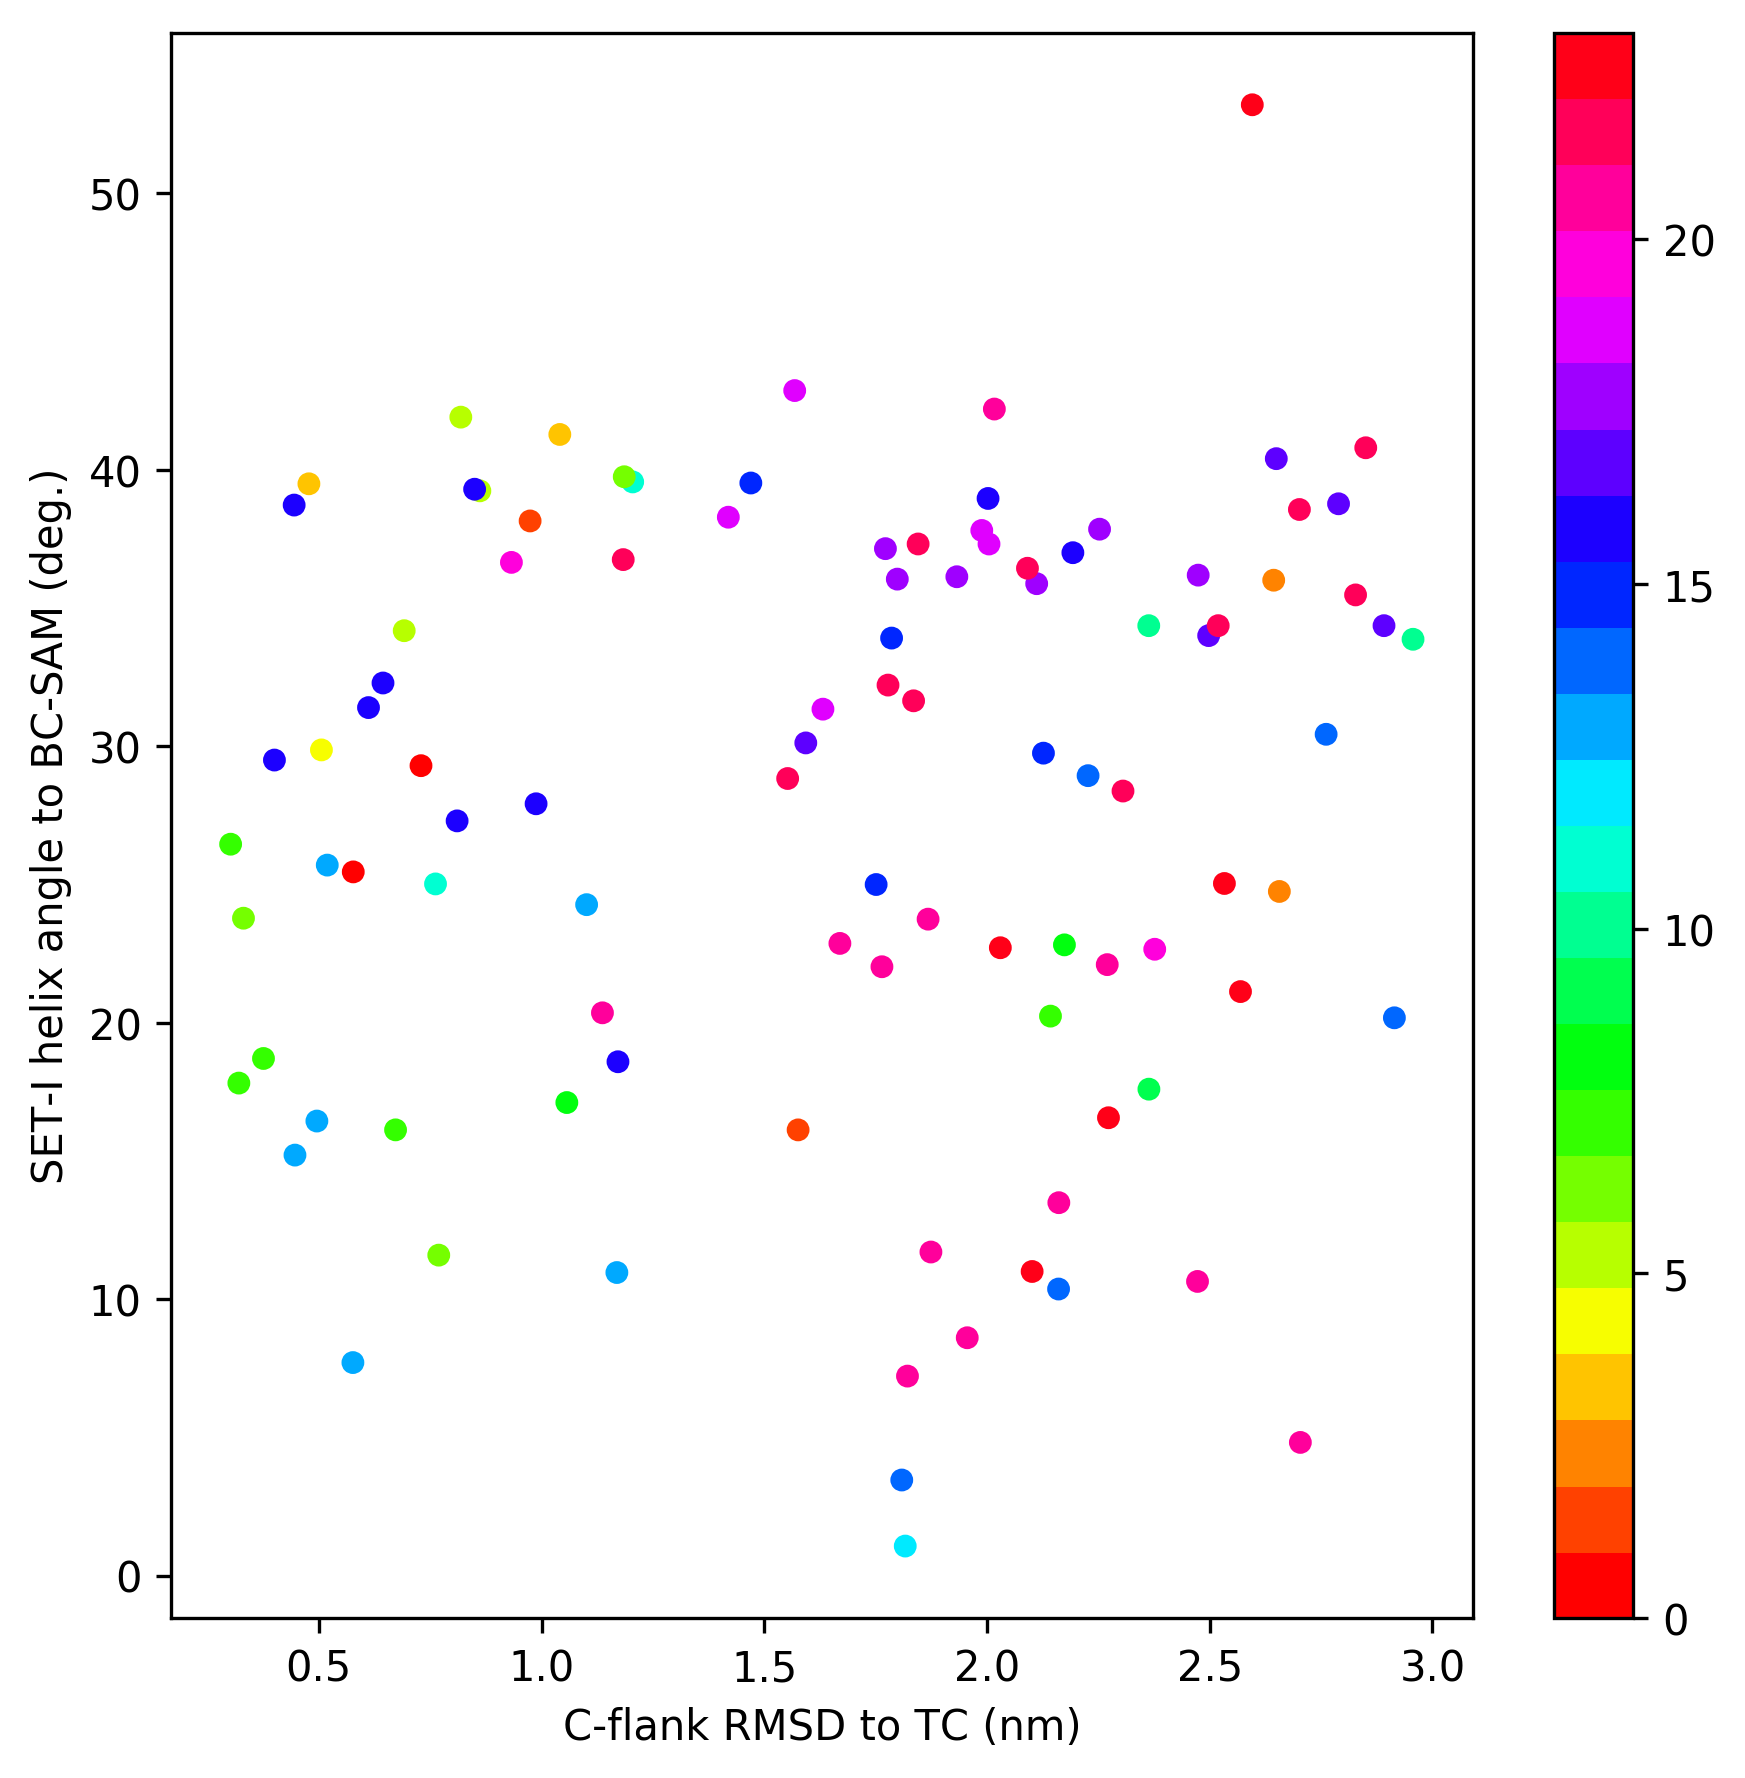

In [56]:
fig, ax = plt.subplots(figsize=(7,7), dpi=300)
sc = ax.scatter(np.array(cflank_rmsds)[:,0,0], angles_ij8, c=c, cmap=cmap, s=20)
plt.xlabel('C-flank RMSD to TC (nm)')
plt.ylabel('SET-I helix angle to BC-SAM (deg.)')
plt.colorbar(sc)
plt.savefig('rmsd_all_microstates/2d_sam_all.png', dpi=300)
plt.show()    

In [58]:
for macrostate in range(24):
    fig, ax = plt.subplots(figsize=(7,7), dpi=300)
    ax.scatter(np.array(cflank_rmsds)[meta_sets[macrostate],0,0], np.array(angles_ij8)[meta_sets[macrostate]], c='red', s=20)
    ax.scatter(np.array(cflank_rmsds)[np.array([x for x in range(100) if x not in meta_sets[macrostate]]),0,0], np.array(angles_ij8)[np.array([x for x in range(100) if x not in meta_sets[macrostate]])], c='black', s=20)
    plt.xlabel('C-flank RMSD to TC (nm)')
    plt.ylabel('SET-I helix angle to BC-SAM (deg.)')
    plt.tight_layout()
    plt.savefig('rmsd_all_microstates/2d_sam/%d.png' % macrostate, dpi=300)
    plt.close()

In [57]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [1]:
#### 12/4 - make plots for Shi: RMSD to Apo for all macrostates (top microstate - top frame / macrostate)

In [26]:
import seaborn as sns
sns.set_style('ticks')

In [20]:
apo_only_rmsds = []

for i in range(24):
    j = np.argmax(meta_membs[:,i])
    apo_only_rmsds.append(whole_rmsds[j][2][0])

In [21]:
apo_only_rmsds

[0.8441875,
 0.60850072,
 0.91104656,
 0.91910988,
 0.84426981,
 0.86809778,
 0.78202337,
 0.77132761,
 0.48362562,
 0.57162231,
 1.2426858,
 0.67695361,
 0.68982613,
 0.83079988,
 0.78068638,
 0.54714,
 0.70208341,
 1.0451217,
 0.48794293,
 0.67809993,
 0.4039011,
 0.38180149,
 0.92904907,
 0.49736232]

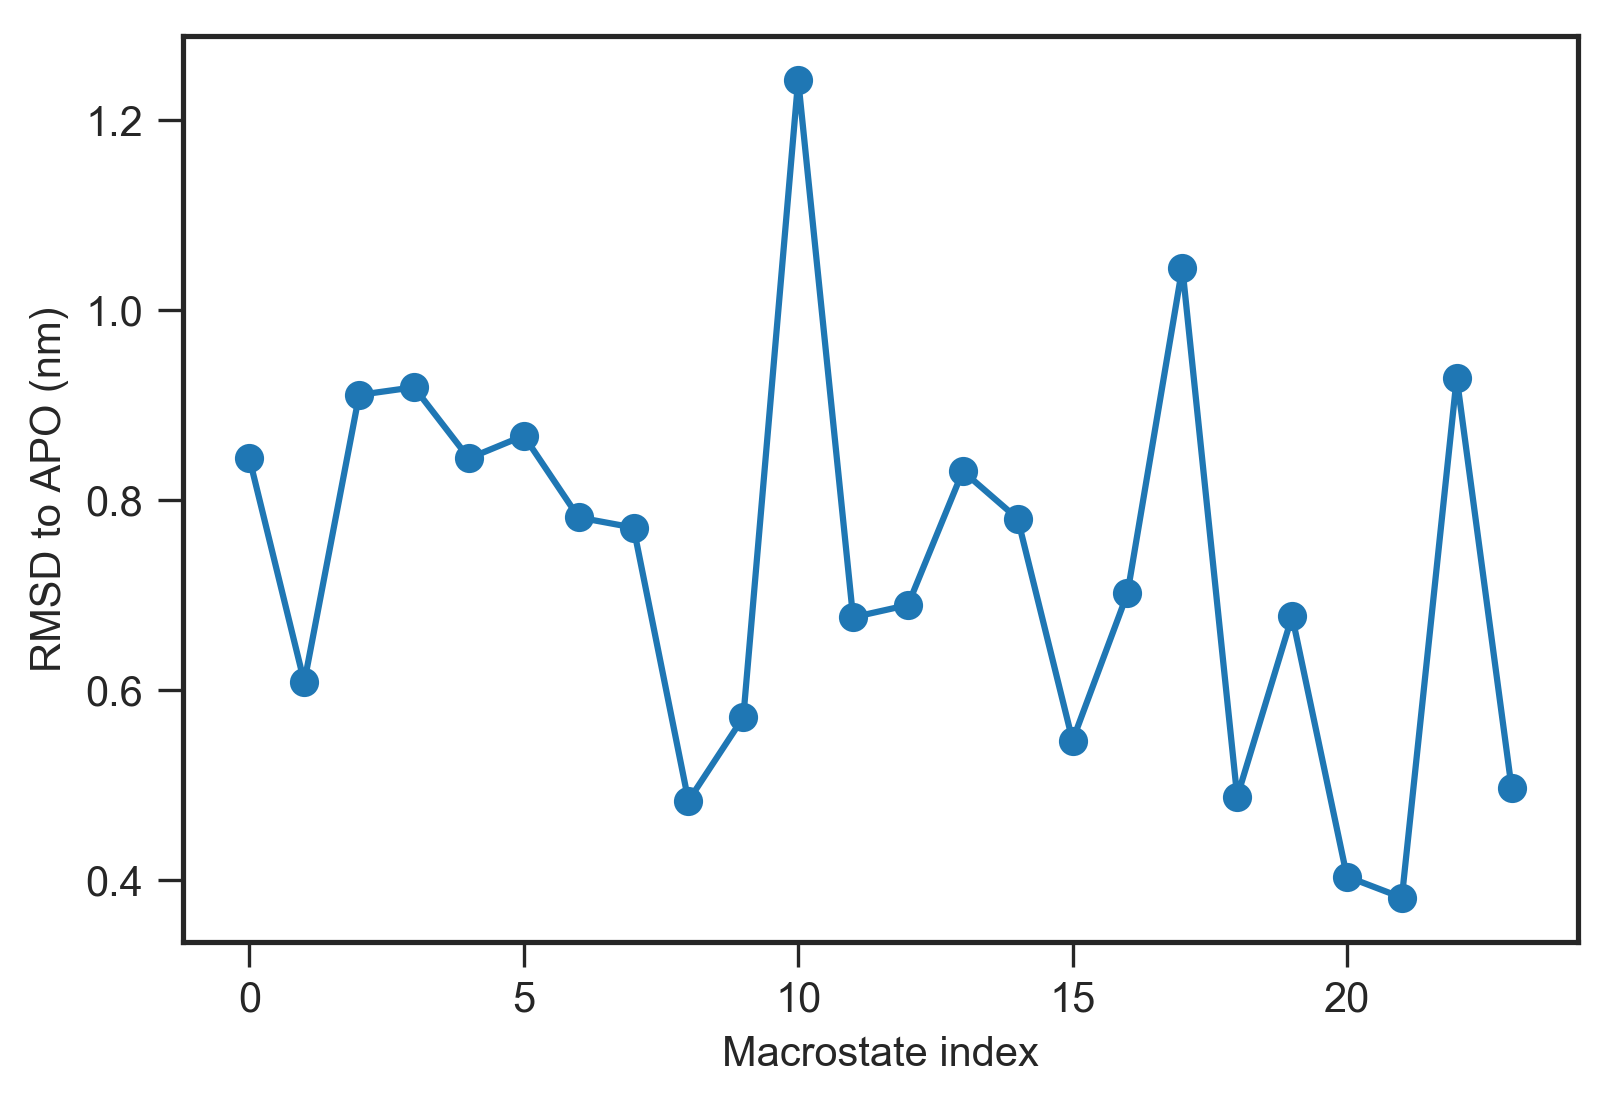

In [30]:
fig, ax = plt.subplots(dpi=300)
ax.plot(range(len(apo_only_rmsds)), apo_only_rmsds)
ax.scatter(range(len(apo_only_rmsds)), apo_only_rmsds)
plt.xlabel('Macrostate index')
plt.ylabel('RMSD to APO (nm)')
plt.savefig('custom_rmsd/apo_top_microstate_macrostate_rmsd.png', dpi=300)
plt.savefig('custom_rmsd/apo_top_microstate_macrostate_rmsd.pdf', dpi=300)
plt.show()

In [33]:
np.savetxt('custom_rmsd/apo_top_microstate_macrostate_rmsd.csv', apo_only_rmsds, delimiter=',')

In [34]:
# now save all 3D RMSD data to csv

In [46]:
tc_only_rmsds = []
bc_sam_only_rmsds = []
apo_only_rmsds = []

for i in range(24):
    j = np.argmax(meta_membs[:,i])
    tc_only_rmsds.append(whole_rmsds[j][0][0])

for i in range(24):
    j = np.argmax(meta_membs[:,i])
    bc_sam_only_rmsds.append(whole_rmsds[j][1][0])
    
for i in range(24):
    j = np.argmax(meta_membs[:,i])
    apo_only_rmsds.append(whole_rmsds[j][2][0])

In [51]:
tc_only_rmsds_micro = []
bc_sam_only_rmsds_micro = []
apo_only_rmsds_micro = []

for i in range(100):
    tc_only_rmsds_micro.append(whole_rmsds[i][0][0])

for i in range(100):
    bc_sam_only_rmsds_micro.append(whole_rmsds[i][1][0])
    
for i in range(100):
    apo_only_rmsds_micro.append(whole_rmsds[i][2][0])

In [50]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [52]:
#mkdir rmsd_data

In [1]:
pwd

'/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/msm/cluster_centers_top10'

In [53]:
np.savetxt('rmsd_data/macro_TC.csv', tc_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_BC-SAM.csv', bc_sam_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_APO.csv', apo_only_rmsds, delimiter=',')

In [54]:
np.savetxt('rmsd_data/micro_TC.csv', tc_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_BC-SAM.csv', bc_sam_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_APO.csv', apo_only_rmsds_micro, delimiter=',')

In [ ]:
# now calculate RMSDs for Inh1 and Inh2

In [56]:
inh1 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/inh_a.pdb')
inh2 = md.load('/Users/rafalpwiewiora/repos/MSM/sasa/models/inh2_a.pdb')

In [57]:
inh1_ca = inh1.atom_slice(inh1.top.select('name CA'))
inh2_ca = inh2.atom_slice(inh2.top.select('name CA'))

In [59]:
inh1_rmsds = []
inh2_rmsds = []
selection1 = np.concatenate([np.arange(24,59), np.arange(94,144)])

rmsds_array = inh1_rmsds
trajectory = inh1_ca

reference = zkk_ca                 
trajectory.superpose(reference, atom_indices=selection1)
rmsds_array.append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))

reference = ij8_ca             
trajectory.superpose(reference, atom_indices=selection1)
rmsds_array.append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))

reference = apo_ca                   
trajectory.superpose(reference, atom_indices=selection1)
rmsds_array.append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))

####

rmsds_array = inh2_rmsds
trajectory = inh2_ca

reference = zkk_ca                        
trajectory.superpose(reference, atom_indices=selection1)
rmsds_array.append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))

reference = ij8_ca                        
trajectory.superpose(reference, atom_indices=selection1)
rmsds_array.append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
            
reference = apo_ca                        
trajectory.superpose(reference, atom_indices=selection1)
rmsds_array.append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))

In [60]:
inh1_rmsds

[array([ 0.49853837], dtype=float32),
 array([ 0.60231346], dtype=float32),
 array([ 0.60329419], dtype=float32)]

In [61]:
inh2_rmsds

[array([ 1.16716707], dtype=float32),
 array([ 1.16065013], dtype=float32),
 array([ 1.23836601], dtype=float32)]

In [64]:
np.savetxt('rmsd_data/BC-Inh2_3D_rmsds_TC_BCSAM_APO.csv', inh1_rmsds, delimiter=',')

In [65]:
np.savetxt('rmsd_data/BC-Inh1_3D_rmsds_TC_BCSAM_APO.csv', inh2_rmsds, delimiter=',')

In [66]:
# also calculate BC-SAM RMSD to Apo

In [69]:
md.rmsd(ij8_ca, apo_ca)

array([ 0.63195312], dtype=float32)

In [2]:
# also do all heavy atom RMSDs (the above are C-alpha)

In [ ]:
whole_rmsds = []
selection1 = np.concatenate([np.arange(24,59), np.arange(94,144)])

for i in range(100):
    trajectory = cluster_top10_ca[i]
    whole_rmsds.append([])
         
    # whole protein
    reference = zkk_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
    
    reference = ij8_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))
                            
    reference = apo_ca                        
    trajectory.superpose(reference, atom_indices=selection1)
    whole_rmsds[-1].append(np.sqrt(3*np.mean((trajectory.xyz - reference.xyz)**2, axis=(1,2))))

In [ ]:
meta_membs = np.load('/Users/rafalpwiewiora/repos/MSM/11707_11709_SET8_apo_FINAL/dih_full_dset/hmms/results/25/metastable_memberships.npy')

In [ ]:
np.savetxt('rmsd_data/macro_TC.csv', tc_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_BC-SAM.csv', bc_sam_only_rmsds, delimiter=',')
np.savetxt('rmsd_data/macro_APO.csv', apo_only_rmsds, delimiter=',')

In [ ]:
np.savetxt('rmsd_data/micro_TC.csv', tc_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_BC-SAM.csv', bc_sam_only_rmsds_micro, delimiter=',')
np.savetxt('rmsd_data/micro_APO.csv', apo_only_rmsds_micro, delimiter=',')